# Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive_dataset_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset'

## Target Dataset

In [ ]:
imgs = os.listdir(os.path.join(drive_dataset_path, 'Images'))

In [ ]:
attribute_df = pd.read_csv(os.path.join(drive_dataset_path, 'list_attribute.txt'), delimiter=r'\s+', skiprows=1)

In [ ]:
attribute_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
df = attribute_df[['Male']]

In [ ]:
df.head()

,Male
000001.jpg,-1
000002.jpg,-1
000003.jpg,1
000004.jpg,-1
000005.jpg,-1


In [ ]:
df.replace(-1, 0, inplace=True)

<ipython-input-10-d84944b5799e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(-1, 0, inplace=True)


In [ ]:
df.head()

,Male
000001.jpg,0
000002.jpg,0
000003.jpg,1
000004.jpg,0
000005.jpg,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Male    202599 non-null  int64
dtypes: int64(1)
memory usage: 3.1+ MB


In [ ]:
target_df = df.loc[df.index.isin(imgs)]

In [ ]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 000051.jpg to 202566.jpg
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Male    5000 non-null   int64
dtypes: int64(1)
memory usage: 78.1+ KB


In [ ]:
target_df.value_counts()

Male
0       2953
1       2047
dtype: int64

## Handle Imbalanced Data

### Undersampling

In [ ]:
def undersampling(df, target):
    # Get the counts of each class
    class_counts = df[target].value_counts()

    # Find the minority class
    minority_class = class_counts.idxmin()

    # Get the number of samples in the minority class
    minority_class_count = class_counts[minority_class]

    # Get indices of the majority class
    majority_class_indices = df[df[target] != minority_class].index

    # Randomly sample from the majority class to match the minority class
    undersampled_majority_indices = df[df[target] == minority_class].index.union(
        df.loc[majority_class_indices].sample(n=minority_class_count, random_state=42).index
    )

    # Create the balanced dataset
    balanced_df = df.loc[undersampled_majority_indices]

    # Your balanced dataset
    print(balanced_df[target].value_counts())

    return balanced_df

In [ ]:
target_df = undersampling(target_df, 'Male')

1    2047
0    2047
Name: Male, dtype: int64


## Image Dataset

## Train Val Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_test_df = train_test_split(target_df, random_state=88, test_size=0.3, stratify=target_df['Male'])
val_df, test_df = train_test_split(val_test_df, random_state=88, test_size=0.4, stratify=val_test_df['Male'])

In [ ]:
train_df.head()

,Male
139406.jpg,1
172061.jpg,1
069813.jpg,0
142502.jpg,0
136281.jpg,0


In [ ]:
train_df.value_counts()

Male
1       1433
0       1432
dtype: int64

In [ ]:
val_df.head()

,Male
114107.jpg,0
094352.jpg,0
005334.jpg,0
016823.jpg,1
176695.jpg,0


In [ ]:
val_df.value_counts()

Male
0       369
1       368
dtype: int64

In [ ]:
test_df.head()

,Male
054207.jpg,0
016633.jpg,0
159609.jpg,1
198957.jpg,0
173754.jpg,0


In [ ]:
test_df.value_counts()

Male
0       246
1       246
dtype: int64

In [ ]:
train_male_files = train_df[train_df['Male'] == 1].index.to_list()
train_female_files = train_df[train_df['Male'] == 0].index.to_list()

val_male_files = val_df[val_df['Male'] == 1].index.to_list()
val_female_files = val_df[val_df['Male'] == 0].index.to_list()

test_male_files = test_df[test_df['Male'] == 1].index.to_list()
test_female_files = test_df[test_df['Male'] == 0].index.to_list()

In [ ]:
print(f'first 5 train male files: {train_male_files[:5]}')
print(f'first 5 train female files: {train_female_files[:5]}')
print(f'first 5 val male files: {val_male_files[:5]}')
print(f'first 5 val female files: {val_female_files[:5]}')
print(f'first 5 test male files: {test_male_files[:5]}')
print(f'first 5 test female files: {test_female_files[:5]}')

first 5 train male files: ['139406.jpg', '172061.jpg', '002125.jpg', '090773.jpg', '160302.jpg']
first 5 train female files: ['069813.jpg', '142502.jpg', '136281.jpg', '074374.jpg', '006236.jpg']
first 5 val male files: ['016823.jpg', '065387.jpg', '017366.jpg', '157981.jpg', '074839.jpg']
first 5 val female files: ['114107.jpg', '094352.jpg', '005334.jpg', '176695.jpg', '088225.jpg']
first 5 test male files: ['159609.jpg', '045903.jpg', '097471.jpg', '000771.jpg', '108680.jpg']
first 5 test female files: ['054207.jpg', '016633.jpg', '198957.jpg', '173754.jpg', '152701.jpg']


### Create Folder Structure

In [ ]:
train_male_path = os.path.join(drive_dataset_path, 'gender/train/male')
train_female_path = os.path.join(drive_dataset_path, 'gender/train/female')

val_male_path = os.path.join(drive_dataset_path, 'gender/validation/male')
val_female_path = os.path.join(drive_dataset_path, 'gender/validation/female')

test_male_path = os.path.join(drive_dataset_path, 'gender/test/male')
test_female_path = os.path.join(drive_dataset_path, 'gender/test/female')

Run once only

In [ ]:
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/train/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/validation/female
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/male
# !mkdir /content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset/gender/test/female

In [ ]:
# import shutil

Handle missing values while restructure to ignore images which size equal to 0 bytes

In [ ]:
# def copy_files(source, dest, files):
#     # Copy each file from the source to the destination directory
#     for f in files:
#         if os.path.getsize(os.path.join(source, f)) > 0:
#             if not os.path.exists(os.path.join(dest, f)):
#                 source_path = os.path.join(source, f)
#                 destination_path = os.path.join(dest, f)
#                 shutil.copyfile(source_path, destination_path)
#         else:
#             print(f + " is zero length, so ignoring.")

In [ ]:
# def remove_not_existing_files(path, files):
#     rm_files = []
#     for f in os.listdir(path):
#         if f not in files:
#             rm_files.append(f)

#     for f in rm_files:
#         if os.path.exists(os.path.join(path, f)):
#             os.remove(os.path.join(path, f))
#             print(f"File '{f}' has been deleted.")

In [ ]:
# def remove_missing_files(path, files):
#     for f in files:
#         if os.path.exists(os.path.join(path, f)):
#             if not os.path.getsize(os.path.join(path, f)) > 0:
#                 os.remove(os.path.join(path, f))
#                 print(f"File '{f}' has been deleted.")

In [ ]:
# for f in imgs:
#     if os.path.getsize(os.path.join(drive_dataset_path, 'Images', f)) <= 0:
#         print(f)

In [ ]:
# remove_missing_files(train_male_path, train_male_files)
# remove_missing_files(train_female_path, train_female_files)
# remove_missing_files(val_male_path, val_male_files)
# remove_missing_files(val_female_path, val_female_files)
# remove_missing_files(test_male_path, test_male_files)
# remove_missing_files(test_female_path, test_female_files)

In [ ]:
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_male_path, train_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), train_female_path, train_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_male_path, val_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), val_female_path, val_female_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_male_path, test_male_files)
# copy_files(os.path.join(drive_dataset_path, 'Images'), test_female_path, test_female_files)

In [ ]:
# remove_not_existing_files(train_male_path, train_male_files)
# remove_not_existing_files(train_female_path, train_female_files)
# remove_not_existing_files(val_male_path, val_male_files)
# remove_not_existing_files(val_female_path, val_female_files)
# remove_not_existing_files(test_male_path, test_male_files)
# remove_not_existing_files(test_female_path, test_female_files)

# Application

## Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_v3_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import confusion_matrix

## Global Config

In [ ]:
MODEL_TYPE = 'vgg16'
APPS = {}

## Additional Metrics

In [ ]:
# Define a custom F1 score metric function that works with TensorFlow tensors
def f1_score(y_true, y_pred):
    y_true = tf.convert_to_tensor(y_true, dtype=tf.float32)
    y_pred = tf.convert_to_tensor(y_pred, dtype=tf.float32)

    true_positives = tf.reduce_sum(tf.math.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.math.round(tf.clip_by_value(y_true, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.math.round(tf.clip_by_value(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    return f1

## Wandb

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

## Specification

### Data Loader

In [ ]:
class DataLoader():
    def __init__(self, app):
        self.app = app
        self.__drive_dataset_path = '/content/drive/MyDrive/cv_bootcamp_indonesiaai/project_1/dataset'

        self.__train_dir = os.path.join(self.__drive_dataset_path, 'gender/train')
        self.__val_dir = os.path.join(self.__drive_dataset_path, 'gender/validation')
        self.__test_dir = os.path.join(self.__drive_dataset_path, 'gender/test')

        self.__train_male_path = os.path.join(self.__drive_dataset_path, 'gender/train/male')
        self.__train_female_path = os.path.join(self.__drive_dataset_path, 'gender/train/female')

        self.__val_male_path = os.path.join(self.__drive_dataset_path, 'gender/validation/male')
        self.__val_female_path = os.path.join(self.__drive_dataset_path, 'gender/validation/female')

        self.__test_male_path = os.path.join(self.__drive_dataset_path, 'gender/test/male')
        self.__test_female_path = os.path.join(self.__drive_dataset_path, 'gender/test/female')

        self.get_img_size()
        self.get_preprocessor()

    def get_preprocessor(self):
        if self.app.model_type == 'vgg16':
            self.preprocess_func = vgg16_preprocess_input
        elif self.app.model_type == 'vgg19':
            self.preprocess_func = vgg19_preprocess_input
        elif self.app.model_type == 'googlenet':
            self.preprocess_func = inception_v3_preprocess_input
        elif self.app.model_type == 'resnet50':
            self.preprocess_func = resnet50_preprocess_input

    def get_img_size(self):
        if self.app.model_type in ['vgg16', 'vgg19', 'resnet50']:
            self.app.img_size = 224
        elif self.app.model_type == 'googlenet':
            self.app.img_size = 299

    def get_load_data_generator(self, transform=False):
        self.__train_datagen = ImageDataGenerator(
            preprocessing_function=self.preprocess_func,
            rescale=1/255)
        self.__validation_datagen = ImageDataGenerator(
            preprocessing_function=self.preprocess_func,
            rescale=1/255
            )
        self.__test_datagen = ImageDataGenerator(
            preprocessing_function=self.preprocess_func,
            rescale=1/255
            )
        if transform:
            self.__train_datagen = ImageDataGenerator(
                preprocessing_function=self.preprocess_func,
                rescale=1./255,                 # Normalize pixel values
                rotation_range=30,              # Randomly rotate images (e.g., 10 degrees)
                width_shift_range=0.2,          # Randomly shift width
                height_shift_range=0.2,         # Randomly shift height
                brightness_range=[0.7, 1.3],    # Random brightness adjustment
                zoom_range=0.2,                 # Random zoom
                horizontal_flip=True,           # Randomly flip horizontally
                fill_mode='nearest'             # Fill in newly created pixels using the nearest existing pixels
            )

    def preprocess(self, transform=False, train_batch_size=128, val_batch_size=32):
        # self.app.set_config('transform', transform)

        self.get_load_data_generator(transform)
        self.app.train_generator = self.__train_datagen.flow_from_directory(
                self.__train_dir,
                target_size=(self.app.img_size, self.app.img_size),
                batch_size=train_batch_size,
                keep_aspect_ratio=True,
                class_mode='binary')

        self.app.validation_generator = self.__validation_datagen.flow_from_directory(
                self.__val_dir,
                target_size=(self.app.img_size, self.app.img_size),
                batch_size=val_batch_size,
                keep_aspect_ratio=True,
                shuffle=False,
                class_mode='binary')

        self.app.test_generator = self.__test_datagen.flow_from_directory(
                self.__test_dir,
                target_size=(self.app.img_size, self.app.img_size),
                batch_size=val_batch_size,
                keep_aspect_ratio=True,
                shuffle=False,
                class_mode='binary')

### Model

In [ ]:
class ModelClassifier():
    def __init__(self, app):
        self.app = app

    def create_base_model(self, weights=None, pretrained=False):
        # self.app.set_config('weights', weights)
        # self.app.set_config('pretrained', pretrained)

        self.input_shape = (self.app.img_size, self.app.img_size, 3)
        self.feature_extractor = None
        if self.app.model_type == 'vgg16':
            self.feature_extractor = VGG16(weights=weights, input_shape=self.input_shape, include_top=False)
        elif self.app.model_type == 'vgg19':
            self.feature_extractor = VGG19(weights=weights, input_shape=self.input_shape, include_top=False)
        elif self.app.model_type == 'googlenet':
            self.feature_extractor = InceptionV3(weights=weights, input_shape=self.input_shape, include_top=False)
        elif self.app.model_type == 'resnet50':
            self.feature_extractor = ResNet50(weights=weights, input_shape=self.input_shape, include_top=False)

        if pretrained:
            for layer in self.feature_extractor.layers:
                layer.trainable = False


    def create_model(self, loss='binary_crossentropy', optimizer={'optimizer': 'adam', 'learning_rate': 0.001}):
        # self.app.set_config('loss', loss)
        # self.app.set_config('optimizer', optimizer)
        # self.app.set_config('metrics', metrics)

        i = tf.keras.layers.Input(shape=self.input_shape)
        x = self.feature_extractor(i)

        x = tf.keras.layers.Flatten()(x)
        # x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = tf.keras.layers.Dense(512, activation='relu')(x)
        # x = tf.keras.layers.Dense(512, activation='relu')(x)
        # x = tf.keras.layers.Dropout(0.2)(x)
        x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

        self.model = tf.keras.Model(i, x, name=self.app.model_type)
        self.model.summary()

        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
        if optimizer['optimizer'] == 'rmsprop':
            opt = tf.keras.optimizers.RMSprop(learning_rate=optimizer['learning_rate'])
        else:
            opt = tf.keras.optimizers.Adam(learning_rate=optimizer['learning_rate'])

        self.model.compile(loss=loss,
                optimizer=opt,
                metrics=['accuracy', f1_score, Precision(name='precision'), Recall(name='recall')])

    def model_callbacks(self):
        return [
            EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1),
            # ModelCheckpoint(filepath=self.get_weight_path_name(), verbose=1, save_best_only=True, monitor='val_accuracy', mode='max'),
            WandbMetricsLogger(),
            WandbModelCheckpoint(filepath=self.app.model_type, save_best_only=True, monitor='val_accuracy', mode='max')
        ]

    def load_model_weights(self, path):
        self.model.load_weights(path)

    def load_model_wandb(self, artifact_path, model_name):
        try:
            run = wandb.init(project="Gender Face Classifier")
            artifact = run.use_artifact(artifact_path, type='model')
            artifact_dir = artifact.download()

            # Load the model
            # loaded_model = wandb.restore(model_name, root='artifacts')
            self.model = tf.keras.models.load_model(f'artifacts/{model_name}', custom_objects={'f1_score': f1_score})
        finally:
            wandb.finish()

    def fit(self, epochs=50, train_batch_size=128, val_batch_size=32):
        self.app.history = self.model.fit(
            self.app.train_generator,
            epochs=50,
            verbose=1,
            validation_data = self.app.validation_generator,
            batch_size=train_batch_size,
            validation_batch_size=val_batch_size,
            callbacks=[self.model_callbacks()]
        )

    def predict(self, test_generator=None):
        if test_generator is None:
            test_generator = self.app.test_generator

        self.app.predictions = self.model.predict(test_generator)

        # Get true labels from the validation generator
        self.app.true_labels = []
        for i in range(len(test_generator)):
            images, labels = test_generator[i]
            self.app.true_labels.extend(labels.reshape(-1, 1))

        self.app.predicted_classes = (self.app.predictions >= 0.5).astype(int)

    def get_weight_path_name(self):
        keys = sorted(self.app.config.keys())

        weight_path_name = ''
        for key in keys:
            weight_path_name += '_'.join([str(key), str(self.app.config[key])])

        weight_path_name += '.hdf5'
        return weight_path_name

    def get_wandb_path_name(self):
        keys = sorted(self.app.config.keys())

        weight_path_name = ''
        for key in keys:
            weight_path_name += '_'.join([str(key), str(self.app.config[key])])

        # weight_path_name += '_{epoch:02d}'
        return weight_path_name

### Evaluator

In [ ]:
class Evaluator():
    def __init__(self, app):
        self.app = app

    def plot_training_metrics(self, metrics='accuracy'):
        #-----------------------------------------------------------
        # Retrieve a list of list results on training and test data
        # sets for each training epoch
        #-----------------------------------------------------------
        epochs=range(len(self.app.history.history[metrics])) # Get number of epochs

        #------------------------------------------------
        # Plot training and validation accuracy per epoch
        #------------------------------------------------
        plt.plot(epochs, self.app.history.history[metrics], 'r')
        plt.plot(epochs, self.app.history.history[f'val_{metrics}'], 'b')
        plt.title(f'Training and validation {metrics}')
        plt.figure()

    def get_confusion_matrix(self):
        return confusion_matrix(self.app.true_labels, self.app.predicted_classes)

    def plot_confusion_matrix(self):
        conf_matrix = confusion_matrix(self.app.true_labels, self.app.predicted_classes)
        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    def get_metrics_path_name(self):
        keys = sorted(self.app.config.keys())

        metrics_path_name = ''
        for key in keys:
            metrics_path_name += '_'.join([str(key), str(self.app.config[key])])

        metrics_path_name += '.txt'
        return metrics_path_name

    def save_training_metrics(self):
        with open(self.get_metrics_path_name(), 'w') as file:
            file.write(f"Training Loss: {self.app.history.history['loss']}\n")
            file.write(f"Training Accuracy: {self.app.history.history['accuracy']}\n")
            file.write(f"Validation Loss: {self.app.history.history['val_loss']}\n")
            file.write(f"Validation Accuracy: {self.app.history.history['val_accuracy']}\n")

### Gender Face Classifier

In [ ]:
class GenderFaceClassifier():
    def __init__(self, model_type):
        available_models = ['vgg16', 'vgg19', 'googlenet', 'resnet50']
        try:
            if model_type not in available_models:
                raise ValueError()
        except:
            print(f"model type not recognized, please choose one from {available_models}")

        self.model_type = model_type

        self.data_loader = DataLoader(self)
        self.classifier = ModelClassifier(self)
        self.evaluator = Evaluator(self)

        self.config = {}
        # self.set_config('model', self.model_type)

    def set_config(self, key, val):
        self.config[key] = val

## Train

In [ ]:
def train_model(model_type, config):
    print(model_type)
    print(config)
    app = GenderFaceClassifier(model_type)
    print('app initialized')
    app.data_loader.preprocess(transform=config['transform'], train_batch_size=config['generator_train_batch_size'], val_batch_size=config['generator_val_batch_size'])
    print('app.data_loader.preprocess')
    app.classifier.create_base_model(config['weights_pretrained']['weights'], config['weights_pretrained']['pretrained'])
    print('app.classifier.create_base_model')
    app.classifier.create_model(loss=config['loss'], optimizer=config['optimizer'])
    print('app.classifier.create_model')
    app.classifier.fit()
    print('app.classifier.fit')

    return app

## Evaluation

In [ ]:
def evaluate_model(app):
    app.classifier.predict()
    app.evaluator.plot_confusion_matrix()

    return app.classifier.model.evaluate(app.test_generator)

## Run

In [ ]:
sweep_config = {
    'method': 'bayes',
    'metric': {
        'name': 'val_accuracy',
        'goal': 'maximize'
    },
    'early_terminate':{
        'type': 'hyperband',
        'min_iter': 5
    },
    'parameters': {
        'optimizer': {
            'values': [
                {
                    'optimizer': 'adam',
                    'learning_rate': 0.001
                },
                {
                    'optimizer': 'adam',
                    'learning_rate': 0.0001
                },
                {
                    'optimizer': 'rmsprop',
                    'learning_rate': 0.001
                },
                {
                    'optimizer': 'rmsprop',
                    'learning_rate': 0.0001
                }
            ]
        }
    }
}

In [ ]:
        # 'transform': {
        #     'values': [False, True]
        # },
        # 'weights_pretrained': {
        #     'values': [
        #         {
        #             'weights': 'imagenet',
        #             'pretrained': True
        #         },
        #         {
        #             'weights': 'imagenet',
        #             'pretrained': False
        #         },
        #         {
        #             'weights': None,
        #             'pretrained': False
        #         }
        #     ]
        # },
        # 'generator_train_batch_size': {
        #     'values': [16, 128]
        # },
        # 'generator_val_batch_size': {
        #     'values': [16, 32]
        # },
        # 'model_train_batch_size': {
        #     'values': [64, 128]
        # },
        # 'model_val_batch_size': {
        #     'values': [16, 32]
        # },

In [ ]:
def run_train(config=None):
    try:
        # Start a run, tracking hyperparameters
        wandb.init(
            # set the wandb project where this run will be logged
            project="Gender Face Classifier",

            # track hyperparameters and run metadata with wandb.config
            config = {},
            group=MODEL_TYPE
        )

        wandb.config.loss = 'binary_crossentropy'
        wandb.config.transform = False
        wandb.config.weights_pretrained = {
            'weights': 'imagenet',
            'pretrained': True
        }
        wandb.config.generator_train_batch_size = 24
        wandb.config.generator_val_batch_size = 8
        wandb.config.model_train_batch_size = 64
        wandb.config.model_val_batch_size = 16


        # wandb.config.optimizer = 'adam'
        # wandb.config.optimizer_params = {}
        # wandb.config.metrics = ['accuracy', f1_score, Precision(), Recall()]

        # train
        app = train_model(MODEL_TYPE, wandb.config)

        # test evaluation
        evs = evaluate_model(app)

        wandb.log({
            'Test loss': evs[0],
            'Test accuracy': evs[1],
            'Test f1_score': evs[2],
            'Test precision': evs[3],
            'Test recall': evs[4]
        })

        APPS[MODEL_TYPE] = app
    finally:
        wandb.finish()

In [ ]:
def run_sweep(model_type):
    MODEL_TYPE = model_type
    sweep_id = wandb.sweep(sweep_config, project="Gender Face Classifier")
    wandb.agent(sweep_id, function=run_train, count=5)

### VGG16

In [ ]:
# train_model('vgg16', {'optimizer': {'learning_rate': 0.001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 16, 'generator_val_batch_size': 4, 'model_train_batch_size': 64, 'model_val_batch_size': 16})

Create sweep with ID: 1ua2n60t
Sweep URL: https://wandb.ai/hendraronaldi/Gender%20Face%20Classifier/sweeps/1ua2n60t


wandb: Agent Starting Run: 4pm8ncdl with config:
wandb: 	optimizer: {'learning_rate': 0.001, 'optimizer': 'rmsprop'}
wandb: Currently logged in as: hendraronaldi. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg16
{'optimizer': {'learning_rate': 0.001, 'optimizer': 'rmsprop'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
            

wandb: WARNING When using `save_best_only`, ensure that the `filepath` argument contains formatting placeholders like `{epoch:02d}` or `{batch:02d}`. This ensures correct interpretation of the logged artifacts.


app.classifier.create_model
Epoch 1/50
120/120 [==============================] - ETA: 0s - loss: 1.0199 - accuracy: 0.7863 - f1_score: 0.7536 - precision: 0.7816 - recall: 0.7947

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 407s 3s/step - loss: 1.0199 - accuracy: 0.7863 - f1_score: 0.7536 - precision: 0.7816 - recall: 0.7947 - val_loss: 0.2911 - val_accuracy: 0.8779 - val_f1_score: 0.4996 - val_precision: 0.8131 - val_recall: 0.9810
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8722 - f1_score: 0.8646 - precision: 0.8656 - recall: 0.8813

wandb: Adding directory to artifact (./vgg16)... Done. 1.6s


120/120 [==============================] - 24s 197ms/step - loss: 0.3180 - accuracy: 0.8722 - f1_score: 0.8646 - precision: 0.8656 - recall: 0.8813 - val_loss: 0.2378 - val_accuracy: 0.8996 - val_f1_score: 0.4981 - val_precision: 0.8467 - val_recall: 0.9755
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9166 - f1_score: 0.9132 - precision: 0.9157 - recall: 0.9176

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 21s 173ms/step - loss: 0.2074 - accuracy: 0.9166 - f1_score: 0.9132 - precision: 0.9157 - recall: 0.9176 - val_loss: 0.5595 - val_accuracy: 0.8128 - val_f1_score: 0.5025 - val_precision: 0.7300 - val_recall: 0.9918
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9347 - f1_score: 0.9355 - precision: 0.9284 - recall: 0.9420

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 23s 188ms/step - loss: 0.1743 - accuracy: 0.9347 - f1_score: 0.9355 - precision: 0.9284 - recall: 0.9420 - val_loss: 0.1978 - val_accuracy: 0.9294 - val_f1_score: 0.4980 - val_precision: 0.8930 - val_recall: 0.9755
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9584 - f1_score: 0.9535 - precision: 0.9588 - recall: 0.9581

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 23s 191ms/step - loss: 0.1174 - accuracy: 0.9584 - f1_score: 0.9535 - precision: 0.9588 - recall: 0.9581 - val_loss: 0.1882 - val_accuracy: 0.9362 - val_f1_score: 0.4959 - val_precision: 0.9105 - val_recall: 0.9674
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0916 - accuracy: 0.9630 - f1_score: 0.9613 - precision: 0.9643 - recall: 0.9616

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 166ms/step - loss: 0.0916 - accuracy: 0.9630 - f1_score: 0.9613 - precision: 0.9643 - recall: 0.9616 - val_loss: 0.2057 - val_accuracy: 0.9294 - val_f1_score: 0.4809 - val_precision: 0.9463 - val_recall: 0.9103
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9717 - f1_score: 0.9705 - precision: 0.9720 - recall: 0.9714

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 21s 174ms/step - loss: 0.0720 - accuracy: 0.9717 - f1_score: 0.9705 - precision: 0.9720 - recall: 0.9714 - val_loss: 0.2043 - val_accuracy: 0.9362 - val_f1_score: 0.4912 - val_precision: 0.9257 - val_recall: 0.9484
Epoch 8/50
120/120 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9822 - f1_score: 0.9828 - precision: 0.9812 - recall: 0.9832

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 166ms/step - loss: 0.0488 - accuracy: 0.9822 - f1_score: 0.9828 - precision: 0.9812 - recall: 0.9832 - val_loss: 0.2257 - val_accuracy: 0.9294 - val_f1_score: 0.4881 - val_precision: 0.9225 - val_recall: 0.9375
Epoch 8: early stopping
app.classifier.fit
62/62 [==============================] - 85s 1s/step


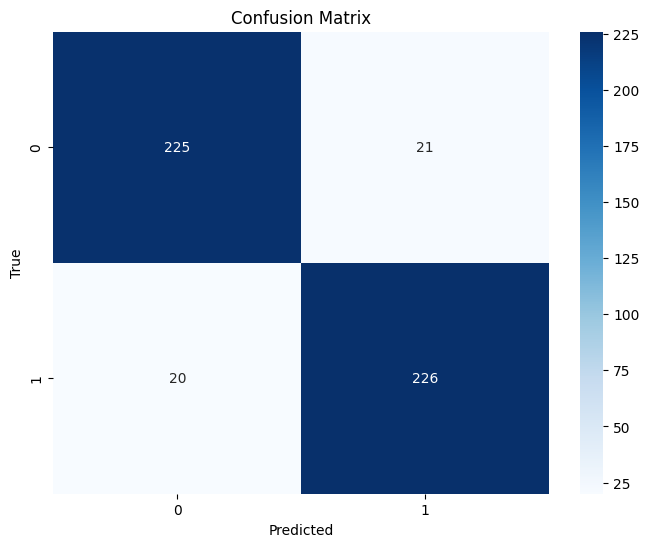

62/62 [==============================] - 3s 51ms/step - loss: 0.2791 - accuracy: 0.9167 - f1_score: 0.4866 - precision: 0.9150 - recall: 0.9187


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▄▆▆▇▇██
epoch/epoch,▁▂▃▄▅▆▇█
epoch/f1_score,▁▄▆▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁▁
epoch/precision,▁▄▆▆▇▇██


wandb: Agent Starting Run: rwn2vyos with config:
wandb: 	optimizer: {'learning_rate': 0.0001, 'optimizer': 'adam'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg16
{'optimizer': {'learning_rate': 0.0001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
              

wandb: Adding directory to artifact (./vgg16)... Done. 1.0s


120/120 [==============================] - 27s 205ms/step - loss: 0.3249 - accuracy: 0.8523 - f1_score: 0.8455 - precision: 0.8448 - recall: 0.8631 - val_loss: 0.2143 - val_accuracy: 0.9254 - val_f1_score: 0.4698 - val_precision: 0.9728 - val_recall: 0.8750
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9434 - f1_score: 0.9418 - precision: 0.9447 - recall: 0.9420

wandb: Adding directory to artifact (./vgg16)... Done. 1.0s


120/120 [==============================] - 23s 194ms/step - loss: 0.1492 - accuracy: 0.9434 - f1_score: 0.9418 - precision: 0.9447 - recall: 0.9420 - val_loss: 0.1601 - val_accuracy: 0.9430 - val_f1_score: 0.4891 - val_precision: 0.9454 - val_recall: 0.9402
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9770 - f1_score: 0.9768 - precision: 0.9763 - recall: 0.9777

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 22s 182ms/step - loss: 0.0794 - accuracy: 0.9770 - f1_score: 0.9768 - precision: 0.9763 - recall: 0.9777 - val_loss: 0.1679 - val_accuracy: 0.9335 - val_f1_score: 0.4929 - val_precision: 0.9164 - val_recall: 0.9538
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9899 - f1_score: 0.9892 - precision: 0.9875 - recall: 0.9923

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 20s 168ms/step - loss: 0.0489 - accuracy: 0.9899 - f1_score: 0.9892 - precision: 0.9875 - recall: 0.9923 - val_loss: 0.1810 - val_accuracy: 0.9349 - val_f1_score: 0.4812 - val_precision: 0.9545 - val_recall: 0.9130
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9930 - f1_score: 0.9924 - precision: 0.9930 - recall: 0.9930

wandb: Adding directory to artifact (./vgg16)... Done. 0.8s


120/120 [==============================] - 20s 170ms/step - loss: 0.0373 - accuracy: 0.9930 - f1_score: 0.9924 - precision: 0.9930 - recall: 0.9930 - val_loss: 0.1673 - val_accuracy: 0.9403 - val_f1_score: 0.4860 - val_precision: 0.9500 - val_recall: 0.9293
Epoch 5: early stopping
app.classifier.fit
62/62 [==============================] - 4s 54ms/step


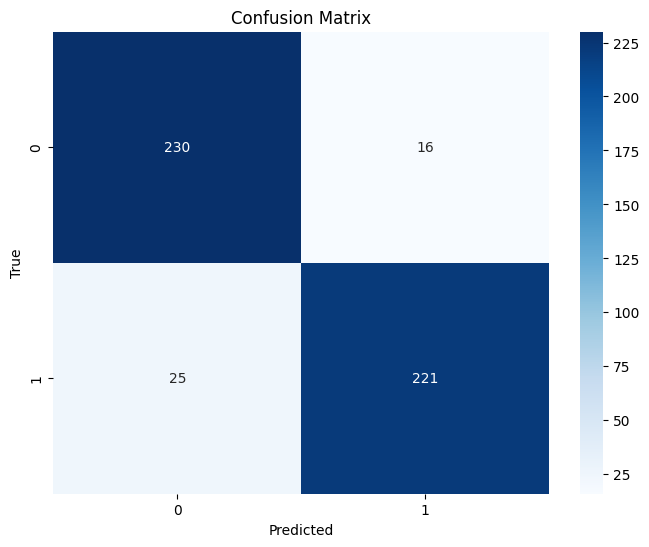

62/62 [==============================] - 3s 52ms/step - loss: 0.2181 - accuracy: 0.9167 - f1_score: 0.4831 - precision: 0.9325 - recall: 0.8984


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▆▇██
epoch/epoch,▁▃▅▆█
epoch/f1_score,▁▆▇██
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▄▂▁▁
epoch/precision,▁▆▇██


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gwpov9c9 with config:
wandb: 	optimizer: {'learning_rate': 0.001, 'optimizer': 'adam'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg16
{'optimizer': {'learning_rate': 0.001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
               

wandb: Adding directory to artifact (./vgg16)... Done. 1.1s


120/120 [==============================] - 26s 201ms/step - loss: 0.6672 - accuracy: 0.8212 - f1_score: 0.7875 - precision: 0.8253 - recall: 0.8149 - val_loss: 0.1802 - val_accuracy: 0.9294 - val_f1_score: 0.4914 - val_precision: 0.9115 - val_recall: 0.9511
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.9434 - f1_score: 0.9428 - precision: 0.9428 - recall: 0.9441

wandb: Adding directory to artifact (./vgg16)... Done. 0.8s


120/120 [==============================] - 21s 174ms/step - loss: 0.1498 - accuracy: 0.9434 - f1_score: 0.9428 - precision: 0.9428 - recall: 0.9441 - val_loss: 0.2063 - val_accuracy: 0.9240 - val_f1_score: 0.4704 - val_precision: 0.9671 - val_recall: 0.8777
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.0830 - accuracy: 0.9728 - f1_score: 0.9716 - precision: 0.9734 - recall: 0.9721

wandb: Adding directory to artifact (./vgg16)... Done. 1.0s


120/120 [==============================] - 24s 196ms/step - loss: 0.0830 - accuracy: 0.9728 - f1_score: 0.9716 - precision: 0.9734 - recall: 0.9721 - val_loss: 0.1723 - val_accuracy: 0.9349 - val_f1_score: 0.4871 - val_precision: 0.9348 - val_recall: 0.9348
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9902 - f1_score: 0.9900 - precision: 0.9882 - recall: 0.9923

wandb: Adding directory to artifact (./vgg16)... Done. 0.6s


120/120 [==============================] - 21s 171ms/step - loss: 0.0432 - accuracy: 0.9902 - f1_score: 0.9900 - precision: 0.9882 - recall: 0.9923 - val_loss: 0.2362 - val_accuracy: 0.9199 - val_f1_score: 0.4995 - val_precision: 0.8741 - val_recall: 0.9810
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9941 - f1_score: 0.9936 - precision: 0.9944 - recall: 0.9937

wandb: Adding directory to artifact (./vgg16)... Done. 1.1s


120/120 [==============================] - 24s 199ms/step - loss: 0.0281 - accuracy: 0.9941 - f1_score: 0.9936 - precision: 0.9944 - recall: 0.9937 - val_loss: 0.1776 - val_accuracy: 0.9389 - val_f1_score: 0.4897 - val_precision: 0.9353 - val_recall: 0.9429
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9993 - f1_score: 0.9991 - precision: 0.9993 - recall: 0.9993

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 20s 169ms/step - loss: 0.0143 - accuracy: 0.9993 - f1_score: 0.9991 - precision: 0.9993 - recall: 0.9993 - val_loss: 0.1966 - val_accuracy: 0.9376 - val_f1_score: 0.4859 - val_precision: 0.9448 - val_recall: 0.9293
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9997 - f1_score: 0.9997 - precision: 0.9993 - recall: 1.0000

wandb: Adding directory to artifact (./vgg16)... Done. 1.0s


120/120 [==============================] - 24s 204ms/step - loss: 0.0083 - accuracy: 0.9997 - f1_score: 0.9997 - precision: 0.9993 - recall: 1.0000 - val_loss: 0.2099 - val_accuracy: 0.9417 - val_f1_score: 0.4866 - val_precision: 0.9501 - val_recall: 0.9321
Epoch 8/50
120/120 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 20s 170ms/step - loss: 0.0045 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2168 - val_accuracy: 0.9403 - val_f1_score: 0.4880 - val_precision: 0.9426 - val_recall: 0.9375
Epoch 9/50
120/120 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000

wandb: Adding directory to artifact (./vgg16)... Done. 0.8s


120/120 [==============================] - 21s 176ms/step - loss: 0.0029 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2263 - val_accuracy: 0.9322 - val_f1_score: 0.4913 - val_precision: 0.9184 - val_recall: 0.9484
Epoch 10/50
120/120 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 20s 168ms/step - loss: 0.0023 - accuracy: 1.0000 - f1_score: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.2279 - val_accuracy: 0.9403 - val_f1_score: 0.4897 - val_precision: 0.9378 - val_recall: 0.9429
Epoch 10: early stopping
app.classifier.fit
62/62 [==============================] - 3s 48ms/step


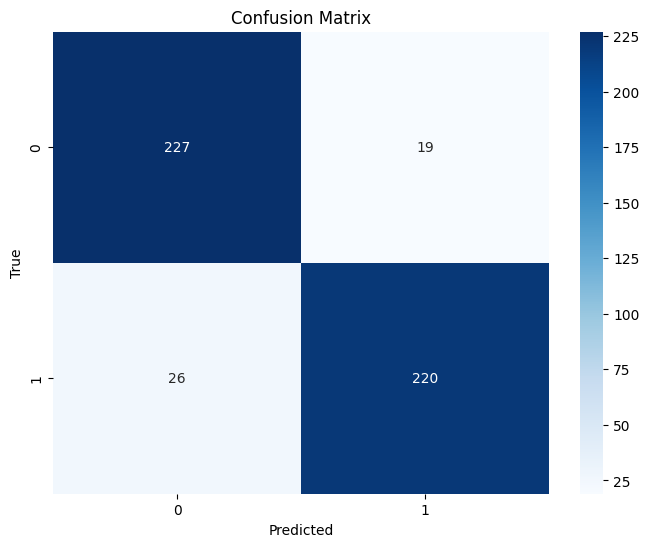

62/62 [==============================] - 3s 52ms/step - loss: 0.2722 - accuracy: 0.9085 - f1_score: 0.4820 - precision: 0.9205 - recall: 0.8943


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▆▇███████
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/f1_score,▁▆▇███████
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▁▁▁▁▁▁▁
epoch/precision,▁▆▇███████


wandb: Agent Starting Run: rrm5k5uw with config:
wandb: 	optimizer: {'learning_rate': 0.001, 'optimizer': 'rmsprop'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg16
{'optimizer': {'learning_rate': 0.001, 'optimizer': 'rmsprop'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
            

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 25s 197ms/step - loss: 0.8682 - accuracy: 0.8122 - f1_score: 0.7848 - precision: 0.8062 - recall: 0.8219 - val_loss: 0.2022 - val_accuracy: 0.9159 - val_f1_score: 0.4960 - val_precision: 0.8768 - val_recall: 0.9674
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.8858 - f1_score: 0.8766 - precision: 0.8776 - recall: 0.8966

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 21s 172ms/step - loss: 0.2870 - accuracy: 0.8858 - f1_score: 0.8766 - precision: 0.8776 - recall: 0.8966 - val_loss: 0.3135 - val_accuracy: 0.8725 - val_f1_score: 0.4307 - val_precision: 0.9824 - val_recall: 0.7582
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.1919 - accuracy: 0.9330 - f1_score: 0.9302 - precision: 0.9324 - recall: 0.9337

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 23s 194ms/step - loss: 0.1919 - accuracy: 0.9330 - f1_score: 0.9302 - precision: 0.9324 - recall: 0.9337 - val_loss: 0.2172 - val_accuracy: 0.9172 - val_f1_score: 0.4651 - val_precision: 0.9723 - val_recall: 0.8587
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9417 - f1_score: 0.9395 - precision: 0.9402 - recall: 0.9434

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 22s 184ms/step - loss: 0.1458 - accuracy: 0.9417 - f1_score: 0.9395 - precision: 0.9402 - recall: 0.9434 - val_loss: 0.2584 - val_accuracy: 0.9186 - val_f1_score: 0.4625 - val_precision: 0.9783 - val_recall: 0.8560
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9602 - f1_score: 0.9560 - precision: 0.9608 - recall: 0.9595

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 24s 201ms/step - loss: 0.1100 - accuracy: 0.9602 - f1_score: 0.9560 - precision: 0.9608 - recall: 0.9595 - val_loss: 0.1812 - val_accuracy: 0.9376 - val_f1_score: 0.4891 - val_precision: 0.9351 - val_recall: 0.9402
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9658 - f1_score: 0.9644 - precision: 0.9645 - recall: 0.9672

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 167ms/step - loss: 0.0893 - accuracy: 0.9658 - f1_score: 0.9644 - precision: 0.9645 - recall: 0.9672 - val_loss: 0.1954 - val_accuracy: 0.9308 - val_f1_score: 0.4951 - val_precision: 0.9054 - val_recall: 0.9620
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9710 - f1_score: 0.9697 - precision: 0.9694 - recall: 0.9728

wandb: Adding directory to artifact (./vgg16)... Done. 0.6s


120/120 [==============================] - 21s 172ms/step - loss: 0.0734 - accuracy: 0.9710 - f1_score: 0.9697 - precision: 0.9694 - recall: 0.9728 - val_loss: 0.2328 - val_accuracy: 0.9281 - val_f1_score: 0.4733 - val_precision: 0.9674 - val_recall: 0.8859
Epoch 8/50
120/120 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9832 - f1_score: 0.9833 - precision: 0.9839 - recall: 0.9825

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 165ms/step - loss: 0.0508 - accuracy: 0.9832 - f1_score: 0.9833 - precision: 0.9839 - recall: 0.9825 - val_loss: 0.2265 - val_accuracy: 0.9349 - val_f1_score: 0.4899 - val_precision: 0.9278 - val_recall: 0.9429
Epoch 8: early stopping
app.classifier.fit
62/62 [==============================] - 4s 55ms/step


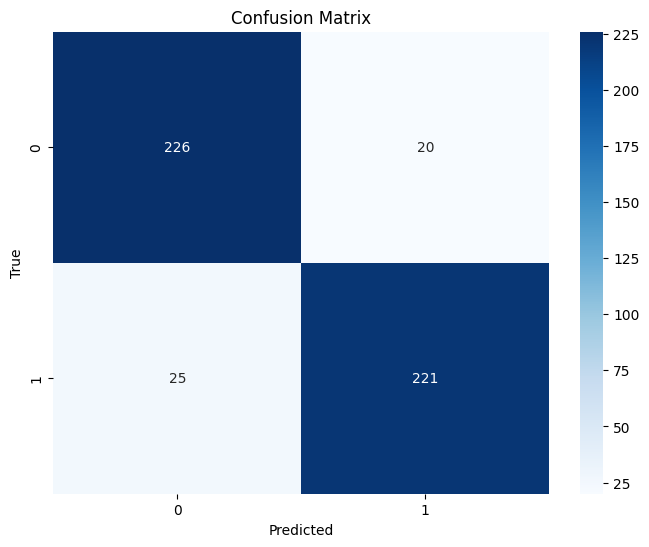

62/62 [==============================] - 3s 54ms/step - loss: 0.2751 - accuracy: 0.9085 - f1_score: 0.4802 - precision: 0.9170 - recall: 0.8984


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▄▆▆▇▇▇█
epoch/epoch,▁▂▃▄▅▆▇█
epoch/f1_score,▁▄▆▆▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▁▁▁
epoch/precision,▁▄▆▆▇▇▇█


wandb: Agent Starting Run: 33xvnte2 with config:
wandb: 	optimizer: {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg16
{'optimizer': {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
           

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 25s 190ms/step - loss: 0.4269 - accuracy: 0.8300 - f1_score: 0.8064 - precision: 0.8247 - recall: 0.8380 - val_loss: 0.3306 - val_accuracy: 0.8643 - val_f1_score: 0.5004 - val_precision: 0.7939 - val_recall: 0.9837
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.2262 - accuracy: 0.9106 - f1_score: 0.9056 - precision: 0.9083 - recall: 0.9134

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 22s 186ms/step - loss: 0.2262 - accuracy: 0.9106 - f1_score: 0.9056 - precision: 0.9083 - recall: 0.9134 - val_loss: 0.2454 - val_accuracy: 0.9050 - val_f1_score: 0.4551 - val_precision: 0.9745 - val_recall: 0.8315
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.1711 - accuracy: 0.9274 - f1_score: 0.9206 - precision: 0.9274 - recall: 0.9274

wandb: Adding directory to artifact (./vgg16)... Done. 0.7s


120/120 [==============================] - 24s 203ms/step - loss: 0.1711 - accuracy: 0.9274 - f1_score: 0.9206 - precision: 0.9274 - recall: 0.9274 - val_loss: 0.1735 - val_accuracy: 0.9335 - val_f1_score: 0.4855 - val_precision: 0.9370 - val_recall: 0.9293
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1220 - accuracy: 0.9522 - f1_score: 0.9501 - precision: 0.9500 - recall: 0.9546

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 167ms/step - loss: 0.1220 - accuracy: 0.9522 - f1_score: 0.9501 - precision: 0.9500 - recall: 0.9546 - val_loss: 0.1855 - val_accuracy: 0.9240 - val_f1_score: 0.4756 - val_precision: 0.9509 - val_recall: 0.8940
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0868 - accuracy: 0.9675 - f1_score: 0.9656 - precision: 0.9659 - recall: 0.9693

wandb: Adding directory to artifact (./vgg16)... Done. 0.6s


120/120 [==============================] - 23s 191ms/step - loss: 0.0868 - accuracy: 0.9675 - f1_score: 0.9656 - precision: 0.9659 - recall: 0.9693 - val_loss: 0.1742 - val_accuracy: 0.9376 - val_f1_score: 0.4859 - val_precision: 0.9448 - val_recall: 0.9293
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9749 - f1_score: 0.9742 - precision: 0.9755 - recall: 0.9742

wandb: Adding directory to artifact (./vgg16)... Done. 0.9s


120/120 [==============================] - 24s 197ms/step - loss: 0.0704 - accuracy: 0.9749 - f1_score: 0.9742 - precision: 0.9755 - recall: 0.9742 - val_loss: 0.1661 - val_accuracy: 0.9403 - val_f1_score: 0.4906 - val_precision: 0.9355 - val_recall: 0.9457
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9811 - f1_score: 0.9777 - precision: 0.9825 - recall: 0.9797

wandb: Adding directory to artifact (./vgg16)... Done. 0.6s


120/120 [==============================] - 20s 169ms/step - loss: 0.0581 - accuracy: 0.9811 - f1_score: 0.9777 - precision: 0.9825 - recall: 0.9797 - val_loss: 0.3916 - val_accuracy: 0.8874 - val_f1_score: 0.5025 - val_precision: 0.8202 - val_recall: 0.9918
Epoch 8/50
120/120 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9857 - f1_score: 0.9846 - precision: 0.9853 - recall: 0.9860

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 21s 171ms/step - loss: 0.0450 - accuracy: 0.9857 - f1_score: 0.9846 - precision: 0.9853 - recall: 0.9860 - val_loss: 0.5958 - val_accuracy: 0.8128 - val_f1_score: 0.3863 - val_precision: 0.9873 - val_recall: 0.6332
Epoch 9/50
120/120 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9899 - f1_score: 0.9897 - precision: 0.9909 - recall: 0.9888

wandb: Adding directory to artifact (./vgg16)... Done. 0.5s


120/120 [==============================] - 20s 166ms/step - loss: 0.0368 - accuracy: 0.9899 - f1_score: 0.9897 - precision: 0.9909 - recall: 0.9888 - val_loss: 0.1879 - val_accuracy: 0.9376 - val_f1_score: 0.4892 - val_precision: 0.9351 - val_recall: 0.9402
Epoch 9: early stopping
app.classifier.fit
62/62 [==============================] - 3s 54ms/step


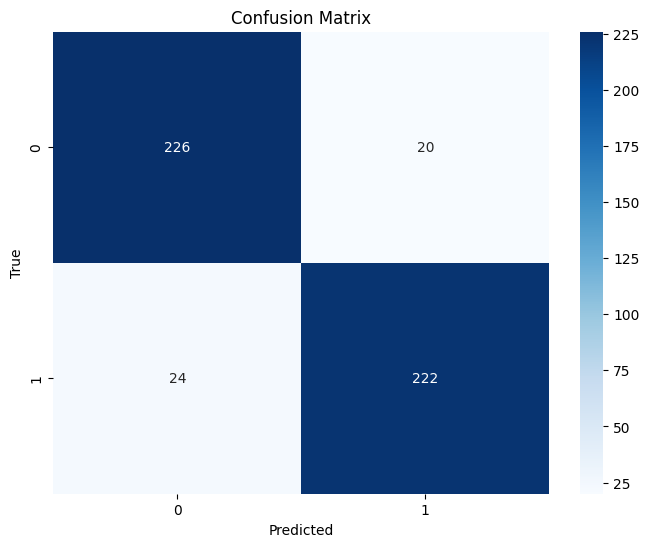

62/62 [==============================] - 3s 53ms/step - loss: 0.2535 - accuracy: 0.9106 - f1_score: 0.4819 - precision: 0.9174 - recall: 0.9024


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▅▅▆▇▇███
epoch/epoch,▁▂▃▄▅▅▆▇█
epoch/f1_score,▁▅▅▆▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▃▂▂▁▁▁
epoch/precision,▁▅▅▆▇▇███


In [ ]:
MODEL_TYPE = 'vgg16'
run_sweep('vgg16')

### VGG19

Create sweep with ID: jln8lckp
Sweep URL: https://wandb.ai/hendraronaldi/Gender%20Face%20Classifier/sweeps/jln8lckp


wandb: Agent Starting Run: 53phe8ww with config:
wandb: 	optimizer: {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg19
{'optimizer': {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
80134624/80134624 [==============================] - 0s 0us/step
app.classifier.create_base_model
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Fl

wandb: Adding directory to artifact (./vgg19)... Done. 1.3s


120/120 [==============================] - 31s 230ms/step - loss: 0.5016 - accuracy: 0.7916 - f1_score: 0.7654 - precision: 0.7881 - recall: 0.7975 - val_loss: 0.4498 - val_accuracy: 0.7992 - val_f1_score: 0.5018 - val_precision: 0.7165 - val_recall: 0.9891
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.8830 - f1_score: 0.8720 - precision: 0.8785 - recall: 0.8890

wandb: Adding directory to artifact (./vgg19)... Done. 0.9s


120/120 [==============================] - 29s 237ms/step - loss: 0.2773 - accuracy: 0.8830 - f1_score: 0.8720 - precision: 0.8785 - recall: 0.8890 - val_loss: 0.2030 - val_accuracy: 0.9213 - val_f1_score: 0.4843 - val_precision: 0.9189 - val_recall: 0.9239
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9033 - f1_score: 0.8964 - precision: 0.8997 - recall: 0.9078

wandb: Adding directory to artifact (./vgg19)... Done. 0.5s


120/120 [==============================] - 25s 206ms/step - loss: 0.2207 - accuracy: 0.9033 - f1_score: 0.8964 - precision: 0.8997 - recall: 0.9078 - val_loss: 0.5550 - val_accuracy: 0.7870 - val_f1_score: 0.5025 - val_precision: 0.7033 - val_recall: 0.9918
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1828 - accuracy: 0.9267 - f1_score: 0.9240 - precision: 0.9261 - recall: 0.9274

wandb: Adding directory to artifact (./vgg19)... Done. 0.7s


120/120 [==============================] - 24s 201ms/step - loss: 0.1828 - accuracy: 0.9267 - f1_score: 0.9240 - precision: 0.9261 - recall: 0.9274 - val_loss: 0.2284 - val_accuracy: 0.9186 - val_f1_score: 0.4686 - val_precision: 0.9611 - val_recall: 0.8723
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.1614 - accuracy: 0.9368 - f1_score: 0.9350 - precision: 0.9359 - recall: 0.9378

wandb: Adding directory to artifact (./vgg19)... Done. 0.5s


120/120 [==============================] - 24s 201ms/step - loss: 0.1614 - accuracy: 0.9368 - f1_score: 0.9350 - precision: 0.9359 - recall: 0.9378 - val_loss: 0.2194 - val_accuracy: 0.9213 - val_f1_score: 0.4717 - val_precision: 0.9559 - val_recall: 0.8832
Epoch 5: early stopping
app.classifier.fit
62/62 [==============================] - 4s 61ms/step


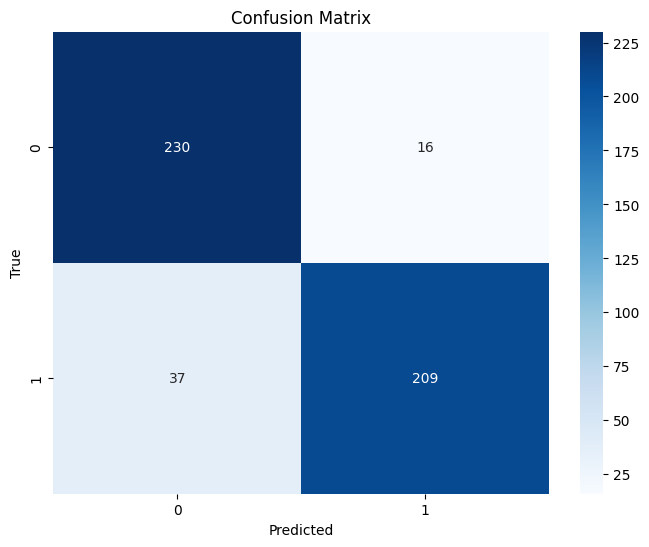

62/62 [==============================] - 4s 64ms/step - loss: 0.2502 - accuracy: 0.8923 - f1_score: 0.4641 - precision: 0.9289 - recall: 0.8496


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▅▆██
epoch/epoch,▁▃▅▆█
epoch/f1_score,▁▅▆██
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▃▂▁▁
epoch/precision,▁▅▆██


wandb: Agent Starting Run: 56ufvk1u with config:
wandb: 	optimizer: {'learning_rate': 0.001, 'optimizer': 'adam'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg19
{'optimizer': {'learning_rate': 0.001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
               

wandb: Adding directory to artifact (./vgg19)... Done. 1.0s


120/120 [==============================] - 31s 238ms/step - loss: 0.7232 - accuracy: 0.8149 - f1_score: 0.7893 - precision: 0.8176 - recall: 0.8108 - val_loss: 0.8958 - val_accuracy: 0.7001 - val_f1_score: 0.5047 - val_precision: 0.6248 - val_recall: 1.0000
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.2259 - accuracy: 0.9068 - f1_score: 0.9000 - precision: 0.9014 - recall: 0.9134

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 29s 240ms/step - loss: 0.2259 - accuracy: 0.9068 - f1_score: 0.9000 - precision: 0.9014 - recall: 0.9134 - val_loss: 0.2183 - val_accuracy: 0.9118 - val_f1_score: 0.4898 - val_precision: 0.8855 - val_recall: 0.9457
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9494 - f1_score: 0.9479 - precision: 0.9472 - recall: 0.9518

wandb: Adding directory to artifact (./vgg19)... Done. 0.9s


120/120 [==============================] - 28s 229ms/step - loss: 0.1300 - accuracy: 0.9494 - f1_score: 0.9479 - precision: 0.9472 - recall: 0.9518 - val_loss: 0.2203 - val_accuracy: 0.9145 - val_f1_score: 0.4906 - val_precision: 0.8880 - val_recall: 0.9484
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9738 - f1_score: 0.9731 - precision: 0.9715 - recall: 0.9763

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 28s 235ms/step - loss: 0.0807 - accuracy: 0.9738 - f1_score: 0.9731 - precision: 0.9715 - recall: 0.9763 - val_loss: 0.2170 - val_accuracy: 0.9240 - val_f1_score: 0.4812 - val_precision: 0.9333 - val_recall: 0.9130
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9808 - f1_score: 0.9796 - precision: 0.9771 - recall: 0.9846

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 29s 243ms/step - loss: 0.0592 - accuracy: 0.9808 - f1_score: 0.9796 - precision: 0.9771 - recall: 0.9846 - val_loss: 0.3884 - val_accuracy: 0.8792 - val_f1_score: 0.4974 - val_precision: 0.8192 - val_recall: 0.9728
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9867 - f1_score: 0.9876 - precision: 0.9861 - recall: 0.9874

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 29s 241ms/step - loss: 0.0428 - accuracy: 0.9867 - f1_score: 0.9876 - precision: 0.9861 - recall: 0.9874 - val_loss: 0.2463 - val_accuracy: 0.9227 - val_f1_score: 0.4786 - val_precision: 0.9380 - val_recall: 0.9049
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9965 - f1_score: 0.9966 - precision: 0.9965 - recall: 0.9965

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 29s 243ms/step - loss: 0.0182 - accuracy: 0.9965 - f1_score: 0.9966 - precision: 0.9965 - recall: 0.9965 - val_loss: 0.2581 - val_accuracy: 0.9227 - val_f1_score: 0.4768 - val_precision: 0.9430 - val_recall: 0.8995
Epoch 7: early stopping
app.classifier.fit
62/62 [==============================] - 4s 62ms/step


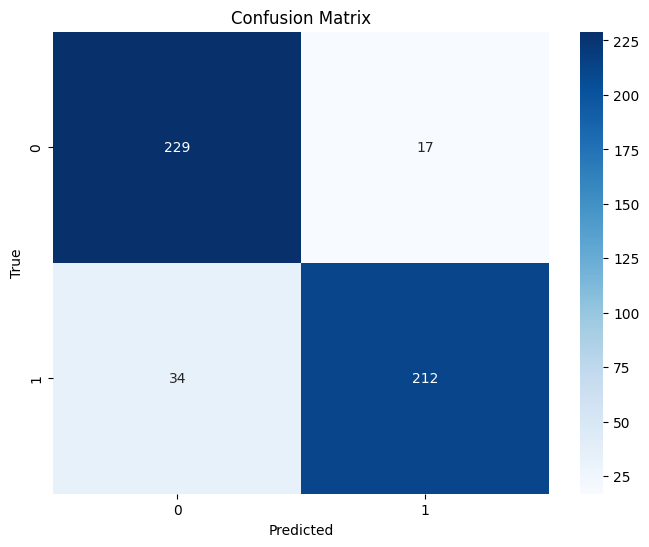

62/62 [==============================] - 4s 65ms/step - loss: 0.2950 - accuracy: 0.8963 - f1_score: 0.4678 - precision: 0.9258 - recall: 0.8618


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▅▆▇▇██
epoch/epoch,▁▂▃▅▆▇█
epoch/f1_score,▁▅▆▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁▁
epoch/precision,▁▄▆▇▇██


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v9ck3om8 with config:
wandb: 	optimizer: {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg19
{'optimizer': {'learning_rate': 0.0001, 'optimizer': 'rmsprop'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
           

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 31s 238ms/step - loss: 0.4727 - accuracy: 0.7989 - f1_score: 0.7688 - precision: 0.7993 - recall: 0.7982 - val_loss: 0.2721 - val_accuracy: 0.8969 - val_f1_score: 0.4529 - val_precision: 0.9679 - val_recall: 0.8207
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.2830 - accuracy: 0.8799 - f1_score: 0.8714 - precision: 0.8788 - recall: 0.8813

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 32s 266ms/step - loss: 0.2830 - accuracy: 0.8799 - f1_score: 0.8714 - precision: 0.8788 - recall: 0.8813 - val_loss: 0.2045 - val_accuracy: 0.9199 - val_f1_score: 0.4822 - val_precision: 0.9233 - val_recall: 0.9158
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.8980 - f1_score: 0.8900 - precision: 0.8942 - recall: 0.9029

wandb: Adding directory to artifact (./vgg19)... Done. 0.6s


120/120 [==============================] - 29s 237ms/step - loss: 0.2212 - accuracy: 0.8980 - f1_score: 0.8900 - precision: 0.8942 - recall: 0.9029 - val_loss: 0.2318 - val_accuracy: 0.9186 - val_f1_score: 0.4683 - val_precision: 0.9639 - val_recall: 0.8696
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.1802 - accuracy: 0.9246 - f1_score: 0.9208 - precision: 0.9211 - recall: 0.9288

wandb: Adding directory to artifact (./vgg19)... Done. 0.9s


120/120 [==============================] - 28s 233ms/step - loss: 0.1802 - accuracy: 0.9246 - f1_score: 0.9208 - precision: 0.9211 - recall: 0.9288 - val_loss: 0.2014 - val_accuracy: 0.9267 - val_f1_score: 0.4803 - val_precision: 0.9410 - val_recall: 0.9103
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9382 - f1_score: 0.9352 - precision: 0.9331 - recall: 0.9441

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 28s 236ms/step - loss: 0.1503 - accuracy: 0.9382 - f1_score: 0.9352 - precision: 0.9331 - recall: 0.9441 - val_loss: 0.2001 - val_accuracy: 0.9308 - val_f1_score: 0.4796 - val_precision: 0.9516 - val_recall: 0.9076
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.1315 - accuracy: 0.9473 - f1_score: 0.9480 - precision: 0.9433 - recall: 0.9518

wandb: Adding directory to artifact (./vgg19)... Done. 0.7s


120/120 [==============================] - 29s 242ms/step - loss: 0.1315 - accuracy: 0.9473 - f1_score: 0.9480 - precision: 0.9433 - recall: 0.9518 - val_loss: 0.2140 - val_accuracy: 0.9254 - val_f1_score: 0.4732 - val_precision: 0.9589 - val_recall: 0.8886
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9605 - f1_score: 0.9555 - precision: 0.9589 - recall: 0.9623

wandb: Adding directory to artifact (./vgg19)... Done. 0.5s


120/120 [==============================] - 24s 201ms/step - loss: 0.0996 - accuracy: 0.9605 - f1_score: 0.9555 - precision: 0.9589 - recall: 0.9623 - val_loss: 0.2081 - val_accuracy: 0.9281 - val_f1_score: 0.4783 - val_precision: 0.9487 - val_recall: 0.9049
Epoch 8/50
120/120 [==============================] - ETA: 0s - loss: 0.0870 - accuracy: 0.9668 - f1_score: 0.9665 - precision: 0.9626 - recall: 0.9714

wandb: Adding directory to artifact (./vgg19)... Done. 0.6s


120/120 [==============================] - 24s 203ms/step - loss: 0.0870 - accuracy: 0.9668 - f1_score: 0.9665 - precision: 0.9626 - recall: 0.9714 - val_loss: 0.2137 - val_accuracy: 0.9172 - val_f1_score: 0.4890 - val_precision: 0.8966 - val_recall: 0.9429
Epoch 8: early stopping
app.classifier.fit
62/62 [==============================] - 4s 61ms/step


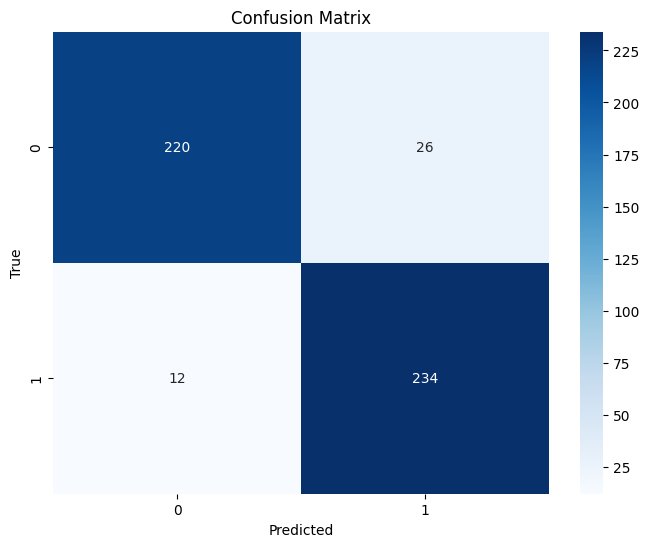

62/62 [==============================] - 4s 64ms/step - loss: 0.2394 - accuracy: 0.9228 - f1_score: 0.4972 - precision: 0.9000 - recall: 0.9512


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▄▅▆▇▇██
epoch/epoch,▁▂▃▄▅▆▇█
epoch/f1_score,▁▅▅▆▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁
epoch/loss,█▅▃▃▂▂▁▁
epoch/precision,▁▄▅▆▇▇██


wandb: Agent Starting Run: a76n024w with config:
wandb: 	optimizer: {'learning_rate': 0.001, 'optimizer': 'adam'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg19
{'optimizer': {'learning_rate': 0.001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
               

wandb: Adding directory to artifact (./vgg19)... Done. 6.9s


120/120 [==============================] - 36s 287ms/step - loss: 0.6760 - accuracy: 0.8240 - f1_score: 0.8087 - precision: 0.8174 - recall: 0.8345 - val_loss: 0.2258 - val_accuracy: 0.9091 - val_f1_score: 0.4937 - val_precision: 0.8716 - val_recall: 0.9592
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9340 - f1_score: 0.9280 - precision: 0.9289 - recall: 0.9399

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 32s 269ms/step - loss: 0.1633 - accuracy: 0.9340 - f1_score: 0.9280 - precision: 0.9289 - recall: 0.9399 - val_loss: 0.2018 - val_accuracy: 0.9267 - val_f1_score: 0.4853 - val_precision: 0.9266 - val_recall: 0.9266
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9679 - f1_score: 0.9670 - precision: 0.9659 - recall: 0.9700

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 28s 235ms/step - loss: 0.0912 - accuracy: 0.9679 - f1_score: 0.9670 - precision: 0.9659 - recall: 0.9700 - val_loss: 0.2145 - val_accuracy: 0.9281 - val_f1_score: 0.4779 - val_precision: 0.9487 - val_recall: 0.9049
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.0700 - accuracy: 0.9752 - f1_score: 0.9750 - precision: 0.9722 - recall: 0.9784

wandb: Adding directory to artifact (./vgg19)... Done. 0.9s


120/120 [==============================] - 25s 207ms/step - loss: 0.0700 - accuracy: 0.9752 - f1_score: 0.9750 - precision: 0.9722 - recall: 0.9784 - val_loss: 0.2476 - val_accuracy: 0.9118 - val_f1_score: 0.4671 - val_precision: 0.9522 - val_recall: 0.8668
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9923 - f1_score: 0.9925 - precision: 0.9930 - recall: 0.9916

wandb: Adding directory to artifact (./vgg19)... Done. 1.0s


120/120 [==============================] - 29s 245ms/step - loss: 0.0337 - accuracy: 0.9923 - f1_score: 0.9925 - precision: 0.9930 - recall: 0.9916 - val_loss: 0.2656 - val_accuracy: 0.9213 - val_f1_score: 0.4714 - val_precision: 0.9586 - val_recall: 0.8804
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9986 - f1_score: 0.9985 - precision: 0.9979 - recall: 0.9993

wandb: Adding directory to artifact (./vgg19)... Done. 0.9s


120/120 [==============================] - 25s 203ms/step - loss: 0.0183 - accuracy: 0.9986 - f1_score: 0.9985 - precision: 0.9979 - recall: 0.9993 - val_loss: 0.2459 - val_accuracy: 0.9267 - val_f1_score: 0.4861 - val_precision: 0.9243 - val_recall: 0.9293
Epoch 6: early stopping
app.classifier.fit
62/62 [==============================] - 4s 62ms/step


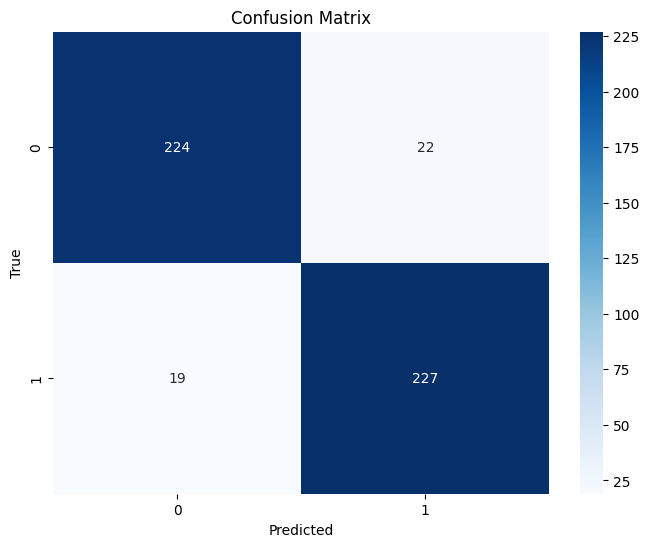

62/62 [==============================] - 4s 65ms/step - loss: 0.2693 - accuracy: 0.9167 - f1_score: 0.4865 - precision: 0.9116 - recall: 0.9228


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▅▇▇██
epoch/epoch,▁▂▄▅▇█
epoch/f1_score,▁▅▇▇██
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▃▂▂▁▁
epoch/precision,▁▅▇▇██


wandb: Agent Starting Run: xrihkc1e with config:
wandb: 	optimizer: {'learning_rate': 0.0001, 'optimizer': 'adam'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


vgg19
{'optimizer': {'learning_rate': 0.0001, 'optimizer': 'adam'}, 'loss': 'binary_crossentropy', 'transform': False, 'weights_pretrained': {'weights': 'imagenet', 'pretrained': True}, 'generator_train_batch_size': 24, 'generator_val_batch_size': 8, 'model_train_batch_size': 64, 'model_val_batch_size': 16}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
              

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 34s 270ms/step - loss: 0.3690 - accuracy: 0.8429 - f1_score: 0.8260 - precision: 0.8368 - recall: 0.8520 - val_loss: 0.2635 - val_accuracy: 0.8915 - val_f1_score: 0.4951 - val_precision: 0.8412 - val_recall: 0.9647
Epoch 2/50
120/120 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9365 - f1_score: 0.9324 - precision: 0.9316 - recall: 0.9420

wandb: Adding directory to artifact (./vgg19)... Done. 1.4s


120/120 [==============================] - 29s 242ms/step - loss: 0.1773 - accuracy: 0.9365 - f1_score: 0.9324 - precision: 0.9316 - recall: 0.9420 - val_loss: 0.1961 - val_accuracy: 0.9199 - val_f1_score: 0.4850 - val_precision: 0.9142 - val_recall: 0.9266
Epoch 3/50
120/120 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9633 - f1_score: 0.9611 - precision: 0.9573 - recall: 0.9700

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 25s 205ms/step - loss: 0.1138 - accuracy: 0.9633 - f1_score: 0.9611 - precision: 0.9573 - recall: 0.9700 - val_loss: 0.2494 - val_accuracy: 0.9009 - val_f1_score: 0.4959 - val_precision: 0.8537 - val_recall: 0.9674
Epoch 4/50
120/120 [==============================] - ETA: 0s - loss: 0.0881 - accuracy: 0.9721 - f1_score: 0.9700 - precision: 0.9701 - recall: 0.9742

wandb: Adding directory to artifact (./vgg19)... Done. 1.2s


120/120 [==============================] - 28s 234ms/step - loss: 0.0881 - accuracy: 0.9721 - f1_score: 0.9700 - precision: 0.9701 - recall: 0.9742 - val_loss: 0.2000 - val_accuracy: 0.9281 - val_f1_score: 0.4828 - val_precision: 0.9363 - val_recall: 0.9185
Epoch 5/50
120/120 [==============================] - ETA: 0s - loss: 0.0575 - accuracy: 0.9860 - f1_score: 0.9855 - precision: 0.9847 - recall: 0.9874

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 25s 206ms/step - loss: 0.0575 - accuracy: 0.9860 - f1_score: 0.9855 - precision: 0.9847 - recall: 0.9874 - val_loss: 0.2005 - val_accuracy: 0.9227 - val_f1_score: 0.4877 - val_precision: 0.9125 - val_recall: 0.9348
Epoch 6/50
120/120 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9951 - f1_score: 0.9954 - precision: 0.9944 - recall: 0.9958

wandb: Adding directory to artifact (./vgg19)... Done. 1.0s


120/120 [==============================] - 25s 209ms/step - loss: 0.0358 - accuracy: 0.9951 - f1_score: 0.9954 - precision: 0.9944 - recall: 0.9958 - val_loss: 0.2094 - val_accuracy: 0.9254 - val_f1_score: 0.4815 - val_precision: 0.9335 - val_recall: 0.9158
Epoch 7/50
120/120 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9955 - f1_score: 0.9948 - precision: 0.9944 - recall: 0.9965

wandb: Adding directory to artifact (./vgg19)... Done. 0.8s


120/120 [==============================] - 25s 204ms/step - loss: 0.0313 - accuracy: 0.9955 - f1_score: 0.9948 - precision: 0.9944 - recall: 0.9965 - val_loss: 0.2459 - val_accuracy: 0.9227 - val_f1_score: 0.4729 - val_precision: 0.9560 - val_recall: 0.8859
Epoch 7: early stopping
app.classifier.fit
62/62 [==============================] - 4s 61ms/step


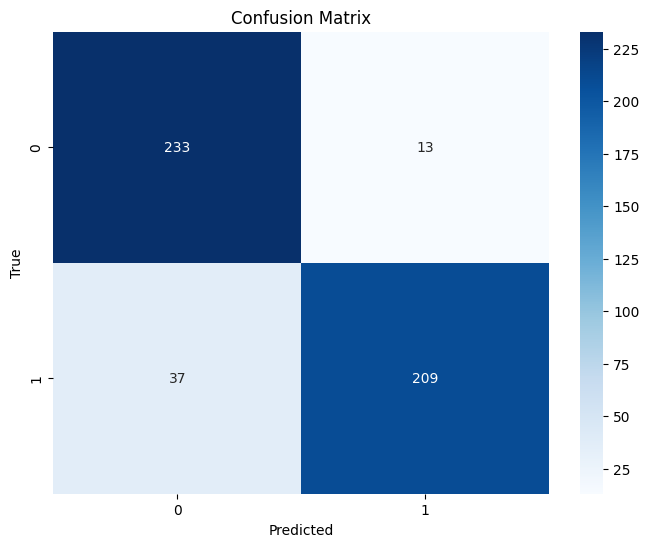

62/62 [==============================] - 4s 65ms/step - loss: 0.2817 - accuracy: 0.8984 - f1_score: 0.4658 - precision: 0.9414 - recall: 0.8496


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▅▇▇███
epoch/epoch,▁▂▃▅▆▇█
epoch/f1_score,▁▅▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▁▁
epoch/precision,▁▅▆▇███


In [ ]:
MODEL_TYPE = 'vgg19'
run_sweep('vgg19')

### Googlenet

In [ ]:
MODEL_TYPE = 'googlenet'
run_sweep('googlenet')

Create sweep with ID: xdfv0oya
Sweep URL: https://wandb.ai/hendraronaldi/Gender%20Face%20Classifier/sweeps/xdfv0oya


wandb: Agent Starting Run: agycuqi0 with config:
wandb: 	generator_train_batch_size: 64
wandb: 	generator_val_batch_size: 16
wandb: 	model_train_batch_size: 128
wandb: 	model_val_batch_size: 16
wandb: 	transform: False
wandb: 	weights_pretrained: {'pretrained': False, 'weights': 'imagenet'}
wandb: Currently logged in as: hendraronaldi. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


googlenet
{'generator_train_batch_size': 64, 'generator_val_batch_size': 16, 'model_train_batch_size': 128, 'model_val_batch_size': 16, 'transform': False, 'weights_pretrained': {'pretrained': False, 'weights': 'imagenet'}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
87910968/87910968 [==============================] - 0s 0us/step
app.classifier.create_base_model
Model: "googlenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten (Flatten)  

wandb: WARNING When using `save_best_only`, ensure that the `filepath` argument contains formatting placeholders like `{epoch:02d}` or `{batch:02d}`. This ensures correct interpretation of the logged artifacts.


app.classifier.create_model
Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 5.5703 - accuracy: 0.7856 - f1_score: 0.7569 - precision: 0.8267 - recall: 0.7228

wandb: Ctrl + C detected. Stopping sweep.


### Resnet50

Create sweep with ID: q5pzo50k
Sweep URL: https://wandb.ai/hendraronaldi/Gender%20Face%20Classifier/sweeps/q5pzo50k


wandb: Agent Starting Run: kecik509 with config:
wandb: 	generator_train_batch_size: 64
wandb: 	generator_val_batch_size: 32
wandb: 	model_train_batch_size: 128
wandb: 	model_val_batch_size: 16
wandb: 	transform: True
wandb: 	weights_pretrained: {'pretrained': False, 'weights': 'imagenet'}
wandb: Currently logged in as: hendraronaldi. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


resnet50
{'generator_train_batch_size': 64, 'generator_val_batch_size': 32, 'model_train_batch_size': 128, 'model_val_batch_size': 16, 'transform': True, 'weights_pretrained': {'pretrained': False, 'weights': 'imagenet'}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                      

wandb: WARNING When using `save_best_only`, ensure that the `filepath` argument contains formatting placeholders like `{epoch:02d}` or `{batch:02d}`. This ensures correct interpretation of the logged artifacts.


app.classifier.create_model
Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 3.5560 - accuracy: 0.7249 - f1_score: 0.7285 - precision: 0.6933 - recall: 0.8066

wandb: Adding directory to artifact (./resnet50)... Done. 8.2s


45/45 [==============================] - 173s 3s/step - loss: 3.5560 - accuracy: 0.7249 - f1_score: 0.7285 - precision: 0.6933 - recall: 0.8066 - val_loss: 0.6932 - val_accuracy: 0.4993 - val_f1_score: 0.5266 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.8708 - f1_score: 0.8722 - precision: 0.8471 - recall: 0.9050

wandb: Adding directory to artifact (./resnet50)... Done. 7.0s


45/45 [==============================] - 79s 2s/step - loss: 0.3103 - accuracy: 0.8708 - f1_score: 0.8722 - precision: 0.8471 - recall: 0.9050 - val_loss: 2.7765 - val_accuracy: 0.4993 - val_f1_score: 0.5266 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9134 - f1_score: 0.9139 - precision: 0.9016 - recall: 0.9281

wandb: Adding directory to artifact (./resnet50)... Done. 20.0s


45/45 [==============================] - 89s 2s/step - loss: 0.2160 - accuracy: 0.9134 - f1_score: 0.9139 - precision: 0.9016 - recall: 0.9281 - val_loss: 1.6122 - val_accuracy: 0.4993 - val_f1_score: 0.5266 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 4/50
45/45 [==============================] - ETA: 0s - loss: 0.1963 - accuracy: 0.9249 - f1_score: 0.9240 - precision: 0.9176 - recall: 0.9337

wandb: Adding directory to artifact (./resnet50)... Done. 5.0s


45/45 [==============================] - 72s 2s/step - loss: 0.1963 - accuracy: 0.9249 - f1_score: 0.9240 - precision: 0.9176 - recall: 0.9337 - val_loss: 0.7340 - val_accuracy: 0.4993 - val_f1_score: 0.5266 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 4: early stopping
app.classifier.fit
16/16 [==============================] - 205s 14s/step


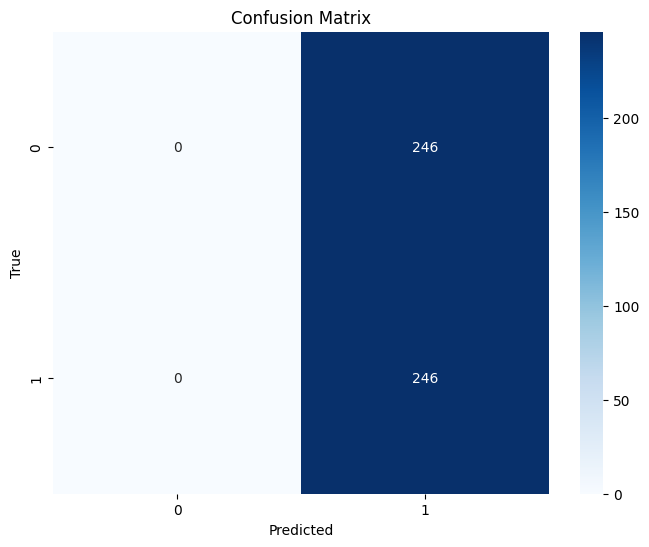

16/16 [==============================] - 2s 109ms/step - loss: 0.7338 - accuracy: 0.5000 - f1_score: 0.5298 - precision: 0.5000 - recall: 1.0000


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▆██
epoch/epoch,▁▃▆█
epoch/f1_score,▁▆██
epoch/learning_rate,▁▁▁▁
epoch/loss,█▁▁▁
epoch/precision,▁▆██


wandb: Agent Starting Run: thvcs24f with config:
wandb: 	generator_train_batch_size: 128
wandb: 	generator_val_batch_size: 32
wandb: 	model_train_batch_size: 128
wandb: 	model_val_batch_size: 32
wandb: 	transform: False
wandb: 	weights_pretrained: {'pretrained': False, 'weights': 'imagenet'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


resnet50
{'generator_train_batch_size': 128, 'generator_val_batch_size': 32, 'model_train_batch_size': 128, 'model_val_batch_size': 32, 'transform': False, 'weights_pretrained': {'pretrained': False, 'weights': 'imagenet'}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                    

Run thvcs24f errored: ResourceExhaustedError()
wandb: ERROR Run thvcs24f errored: ResourceExhaustedError()
wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nxdyueb3 with config:
wandb: 	generator_train_batch_size: 64
wandb: 	generator_val_batch_size: 32
wandb: 	model_train_batch_size: 128
wandb: 	model_val_batch_size: 32
wandb: 	transform: False
wandb: 	weights_pretrained: {'pretrained': True, 'weights': 'imagenet'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


resnet50
{'generator_train_batch_size': 64, 'generator_val_batch_size': 32, 'model_train_batch_size': 128, 'model_val_batch_size': 32, 'transform': False, 'weights_pretrained': {'pretrained': True, 'weights': 'imagenet'}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                      

wandb: Adding directory to artifact (./resnet50)... Done. 3.9s


45/45 [==============================] - 50s 983ms/step - loss: 3.9646 - accuracy: 0.5171 - f1_score: 0.3767 - precision: 0.5187 - recall: 0.4735 - val_loss: 0.6695 - val_accuracy: 0.5197 - val_f1_score: 0.5265 - val_precision: 0.5097 - val_recall: 0.9973
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.6366 - accuracy: 0.6470 - f1_score: 0.5852 - precision: 0.6479 - recall: 0.6439

wandb: Adding directory to artifact (./resnet50)... Done. 4.0s


45/45 [==============================] - 48s 1s/step - loss: 0.6366 - accuracy: 0.6470 - f1_score: 0.5852 - precision: 0.6479 - recall: 0.6439 - val_loss: 0.5540 - val_accuracy: 0.7517 - val_f1_score: 0.4406 - val_precision: 0.7937 - val_recall: 0.6793
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.6844 - f1_score: 0.6375 - precision: 0.6872 - recall: 0.6767

wandb: Adding directory to artifact (./resnet50)... Done. 3.8s


45/45 [==============================] - 19s 414ms/step - loss: 0.5817 - accuracy: 0.6844 - f1_score: 0.6375 - precision: 0.6872 - recall: 0.6767 - val_loss: 0.7153 - val_accuracy: 0.5699 - val_f1_score: 0.1368 - val_precision: 0.8923 - val_recall: 0.1576
Epoch 4/50
45/45 [==============================] - ETA: 0s - loss: 0.5548 - accuracy: 0.7046 - f1_score: 0.6617 - precision: 0.7105 - recall: 0.6906

wandb: Adding directory to artifact (./resnet50)... Done. 16.6s


45/45 [==============================] - 33s 735ms/step - loss: 0.5548 - accuracy: 0.7046 - f1_score: 0.6617 - precision: 0.7105 - recall: 0.6906 - val_loss: 0.5114 - val_accuracy: 0.7178 - val_f1_score: 0.3809 - val_precision: 0.8604 - val_recall: 0.5190
Epoch 5/50
45/45 [==============================] - ETA: 0s - loss: 0.4970 - accuracy: 0.7601 - f1_score: 0.7359 - precision: 0.7686 - recall: 0.7444

wandb: Adding directory to artifact (./resnet50)... Done. 5.5s


45/45 [==============================] - 47s 1s/step - loss: 0.4970 - accuracy: 0.7601 - f1_score: 0.7359 - precision: 0.7686 - recall: 0.7444 - val_loss: 0.4721 - val_accuracy: 0.8168 - val_f1_score: 0.4858 - val_precision: 0.8174 - val_recall: 0.8152
Epoch 6/50
45/45 [==============================] - ETA: 0s - loss: 0.4528 - accuracy: 0.8013 - f1_score: 0.7913 - precision: 0.8076 - recall: 0.7912

wandb: Adding directory to artifact (./resnet50)... Done. 8.3s


45/45 [==============================] - 26s 584ms/step - loss: 0.4528 - accuracy: 0.8013 - f1_score: 0.7913 - precision: 0.8076 - recall: 0.7912 - val_loss: 0.5125 - val_accuracy: 0.7843 - val_f1_score: 0.5244 - val_precision: 0.7086 - val_recall: 0.9647
Epoch 7/50
45/45 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.7922 - f1_score: 0.7836 - precision: 0.7949 - recall: 0.7877

wandb: Adding directory to artifact (./resnet50)... Done. 5.2s


45/45 [==============================] - 21s 463ms/step - loss: 0.4470 - accuracy: 0.7922 - f1_score: 0.7836 - precision: 0.7949 - recall: 0.7877 - val_loss: 0.5138 - val_accuracy: 0.7001 - val_f1_score: 0.3196 - val_precision: 0.8693 - val_recall: 0.4701
Epoch 8/50
45/45 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.7804 - f1_score: 0.7624 - precision: 0.7870 - recall: 0.7689

wandb: Adding directory to artifact (./resnet50)... Done. 6.7s


45/45 [==============================] - 22s 488ms/step - loss: 0.4544 - accuracy: 0.7804 - f1_score: 0.7624 - precision: 0.7870 - recall: 0.7689 - val_loss: 0.5372 - val_accuracy: 0.7463 - val_f1_score: 0.5264 - val_precision: 0.6692 - val_recall: 0.9728
Epoch 8: early stopping
app.classifier.fit
16/16 [==============================] - 4s 131ms/step


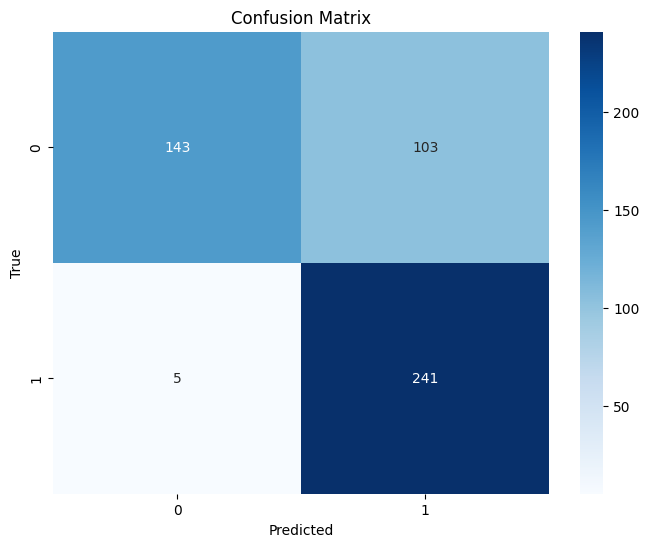

16/16 [==============================] - 2s 113ms/step - loss: 0.4848 - accuracy: 0.7805 - f1_score: 0.5362 - precision: 0.7006 - recall: 0.9797


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▄▅▆▇██▇
epoch/epoch,▁▂▃▄▅▆▇█
epoch/f1_score,▁▅▅▆▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁
epoch/loss,█▁▁▁▁▁▁▁
epoch/precision,▁▄▅▆▇███


wandb: Agent Starting Run: tdtrn3kd with config:
wandb: 	generator_train_batch_size: 64
wandb: 	generator_val_batch_size: 16
wandb: 	model_train_batch_size: 64
wandb: 	model_val_batch_size: 32
wandb: 	transform: True
wandb: 	weights_pretrained: {'pretrained': False, 'weights': None}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


resnet50
{'generator_train_batch_size': 64, 'generator_val_batch_size': 16, 'model_train_batch_size': 64, 'model_val_batch_size': 32, 'transform': True, 'weights_pretrained': {'pretrained': False, 'weights': None}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                             

wandb: Adding directory to artifact (./resnet50)... Done. 16.3s


45/45 [==============================] - 163s 3s/step - loss: 18.1599 - accuracy: 0.4836 - f1_score: 0.3954 - precision: 0.4857 - recall: 0.5594 - val_loss: 0.6961 - val_accuracy: 0.4993 - val_f1_score: 0.5100 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.7901 - accuracy: 0.4983 - f1_score: 0.6622 - precision: 0.4991 - recall: 0.9930

wandb: Adding directory to artifact (./resnet50)... Done. 18.3s


45/45 [==============================] - 95s 2s/step - loss: 0.7901 - accuracy: 0.4983 - f1_score: 0.6622 - precision: 0.4991 - recall: 0.9930 - val_loss: 0.6932 - val_accuracy: 0.4993 - val_f1_score: 0.5100 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4997 - f1_score: 0.6636 - precision: 0.4998 - recall: 0.9993

wandb: Adding directory to artifact (./resnet50)... Done. 12.4s


45/45 [==============================] - 83s 2s/step - loss: 0.6932 - accuracy: 0.4997 - f1_score: 0.6636 - precision: 0.4998 - recall: 0.9993 - val_loss: 0.6931 - val_accuracy: 0.4993 - val_f1_score: 0.5100 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 4/50
45/45 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000 - f1_score: 0.6650 - precision: 0.5000 - recall: 1.0000

wandb: Adding directory to artifact (./resnet50)... Done. 15.3s


45/45 [==============================] - 87s 2s/step - loss: 0.6933 - accuracy: 0.5000 - f1_score: 0.6650 - precision: 0.5000 - recall: 1.0000 - val_loss: 0.6931 - val_accuracy: 0.4993 - val_f1_score: 0.5100 - val_precision: 0.4993 - val_recall: 1.0000
Epoch 4: early stopping
app.classifier.fit
31/31 [==============================] - 3s 64ms/step


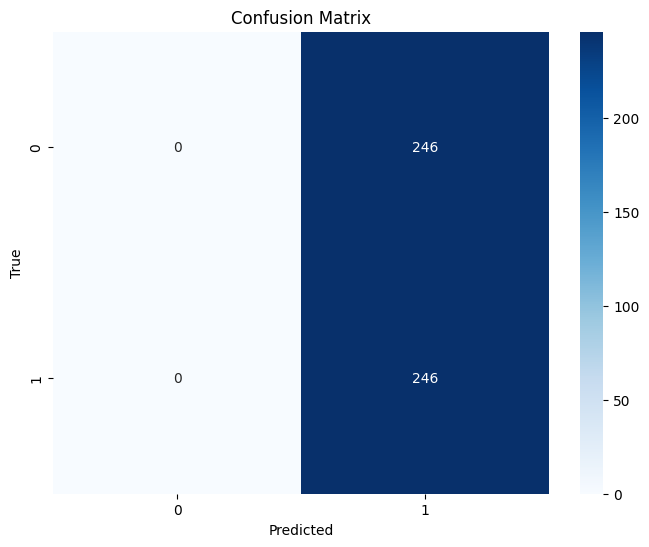

31/31 [==============================] - 3s 81ms/step - loss: 0.6931 - accuracy: 0.5000 - f1_score: 0.5087 - precision: 0.5000 - recall: 1.0000


Test accuracy,▁
Test f1_score,▁
Test loss,▁
Test precision,▁
Test recall,▁
epoch/accuracy,▁▇██
epoch/epoch,▁▃▆█
epoch/f1_score,▁███
epoch/learning_rate,▁▁▁▁
epoch/loss,█▁▁▁
epoch/precision,▁███


wandb: Agent Starting Run: ffj6hy9t with config:
wandb: 	generator_train_batch_size: 128
wandb: 	generator_val_batch_size: 16
wandb: 	model_train_batch_size: 64
wandb: 	model_val_batch_size: 16
wandb: 	transform: False
wandb: 	weights_pretrained: {'pretrained': False, 'weights': 'imagenet'}
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


resnet50
{'generator_train_batch_size': 128, 'generator_val_batch_size': 16, 'model_train_batch_size': 64, 'model_val_batch_size': 16, 'transform': False, 'weights_pretrained': {'pretrained': False, 'weights': 'imagenet'}, 'loss': 'binary_crossentropy', 'optimizer': 'adam', 'optimizer_params': {}}
app initialized
Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
app.data_loader.preprocess
app.classifier.create_base_model
Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                     

Run ffj6hy9t errored: ResourceExhaustedError()
wandb: ERROR Run ffj6hy9t errored: ResourceExhaustedError()


In [ ]:
MODEL_TYPE = 'resnet50'
run_sweep('resnet50')

# Result Evaluation

## VGG16

### Load Best Model

In [ ]:
app = GenderFaceClassifier('vgg16')
app.data_loader.preprocess(transform=False, train_batch_size=64, val_batch_size=32)
app.classifier.create_base_model(weights='imagenet', pretrained=True)
app.classifier.create_model()

Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 512)               12845568  
                                                                 
 dense_19 (Dense)            (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 

In [ ]:
model_name = 'run_0lek9jxu_model:v4'
artifact_path = 'hendraronaldi/Gender Face Classifier/run_0lek9jxu_model:v4'
app.classifier.load_model_wandb(artifact_path, model_name)

wandb: Downloading large artifact run_0lek9jxu_model:v4, 203.56MB. 5 files... 
wandb:   5 of 5 files downloaded.  
Done. 0:0:0.5


### Confusion Matrix

16/16 [==============================] - 102s 6s/step


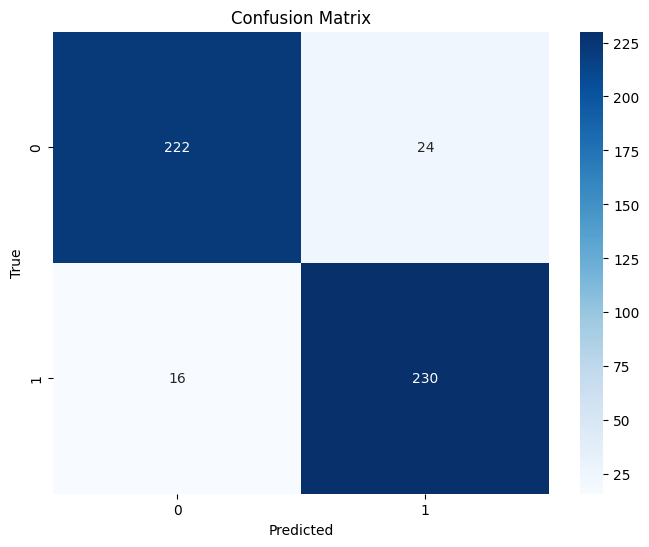

In [ ]:
app.classifier.predict()
app.evaluator.plot_confusion_matrix()

### Error Analysis

In [ ]:
def plot_images_with_labels(images, predictions, true_labels, title):
    plt.figure(figsize=(15, 3))

    for i in range(len(images)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])  # Assuming images are already preprocessed and can be displayed

        pred = predictions[i][0]  # Assuming predictions are in the format [probability]
        true_label = 'Male' if true_labels[i][0] == 1 else 'Female'  # Assuming true labels are in the format [label]

        plt.title(f"True: {true_label}\nPred: {pred*100:.2f}% Male")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [ ]:
def get_random_wrong_predictions(app, num_samples=5):
    # Identify false negatives and false positives
    false_negatives = np.logical_and(np.array(app.true_labels) == 1, app.predicted_classes == 0)
    false_positives = np.logical_and(np.array(app.true_labels) == 0, app.predicted_classes == 1)

    # Get indices of false negatives and false positives
    false_negative_indices = np.where(false_negatives)[0]
    false_positive_indices = np.where(false_positives)[0]

    test_images = []
    for i in range(len(app.test_generator)):
            images, labels = app.test_generator[i]
            for img in images:
                test_images.append(img)
    test_images = np.array(test_images)


    selected_false_negatives = np.random.choice(false_negative_indices, size=min(num_samples, len(false_negative_indices)), replace=False)
    selected_false_positives = np.random.choice(false_positive_indices, size=min(num_samples, len(false_positive_indices)), replace=False)

    # Get the images, predictions, and true labels for the selected false negatives and false positives

    images_false_negatives = [test_images[i] for i in selected_false_negatives]
    preds_prob_false_negatives = app.predictions[selected_false_negatives]
    true_labels_false_negatives = [app.true_labels[i] for i in selected_false_negatives]

    images_false_positives = [test_images[i] for i in selected_false_positives]
    preds_prob_false_positives = app.predictions[selected_false_positives]
    true_labels_false_positives = [app.true_labels[i] for i in selected_false_positives]

    plot_images_with_labels(images_false_negatives, preds_prob_false_negatives, true_labels_false_negatives, "False Negatives")
    print()
    print()
    plot_images_with_labels(images_false_positives, preds_prob_false_positives, true_labels_false_positives, "False Positives")

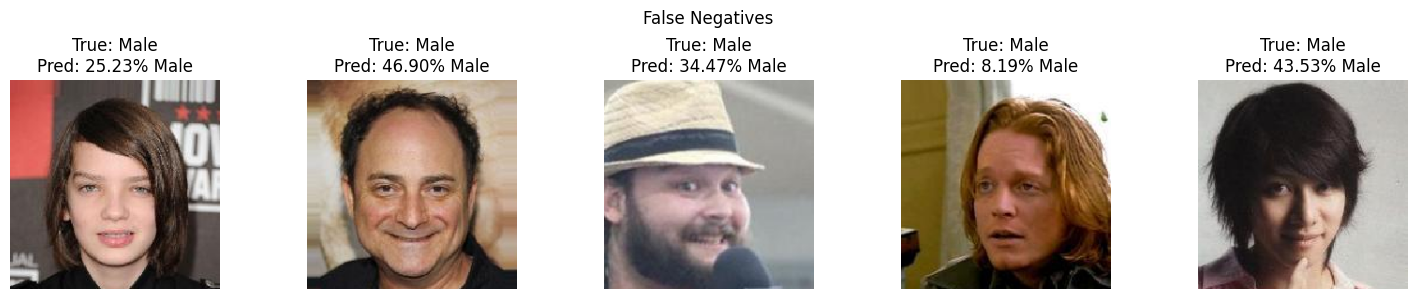

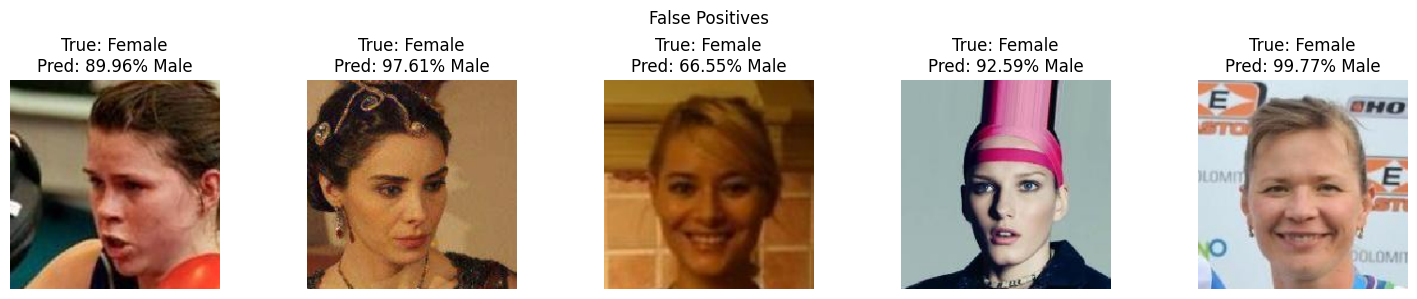

In [ ]:
get_random_wrong_predictions(app, 5)

- Seems to have tendency classifying long hair to `Female` and short hair to `Male`

### Inference Latency

In [ ]:
def inference_latency(app):
    start_time = time.time()

    # Make predictions on a sample data (Replace this with your actual prediction)
    app.classifier.predict()

    end_time = time.time()
    inference_time = end_time - start_time
    print(f"Inference time: {inference_time} seconds on total images: {len(app.test_generator[0][0]) * len(app.test_generator)} and batch_size: {len(app.test_generator[0][0])}")

In [ ]:
inference_latency(app)

16/16 [==============================] - 2s 129ms/step
Inference time: 3.877885103225708 seconds on total images: 512 and batch_size: 32


In [ ]:
def single_img_inference_latency(app):
    sample_img = app.test_generator[0][0][0].reshape(1, 224, 224, 3)
    start_time = time.time()

    # Make predictions on a sample data (Replace this with your actual prediction)
    app.classifier.model.predict(sample_img)

    end_time = time.time()
    inference_time = end_time - start_time
    print(f"Inference time: {inference_time} seconds")

In [ ]:
single_img_inference_latency(app)

1/1 [==============================] - 0s 39ms/step
Inference time: 0.08886885643005371 seconds


## VGG19

### Load Best Model

In [ ]:
app = GenderFaceClassifier('vgg19')
app.data_loader.preprocess(transform=False, train_batch_size=64, val_batch_size=32)
app.classifier.create_base_model(weights='imagenet', pretrained=True)
app.classifier.create_model()

Found 2864 images belonging to 2 classes.
Found 737 images belonging to 2 classes.
Found 492 images belonging to 2 classes.
80134624/80134624 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Tota

In [ ]:
model_name = 'run_v9ck3om8_model:v3'
artifact_path = 'hendraronaldi/Gender Face Classifier/run_v9ck3om8_model:v3'
app.classifier.load_model_wandb(artifact_path, model_name)

wandb: Currently logged in as: hendraronaldi. Use `wandb login --relogin` to force relogin


wandb: Downloading large artifact run_v9ck3om8_model:v3, 174.86MB. 5 files... 
wandb:   5 of 5 files downloaded.  
Done. 0:0:13.0


### Confusion Matrix

16/16 [==============================] - 202s 12s/step


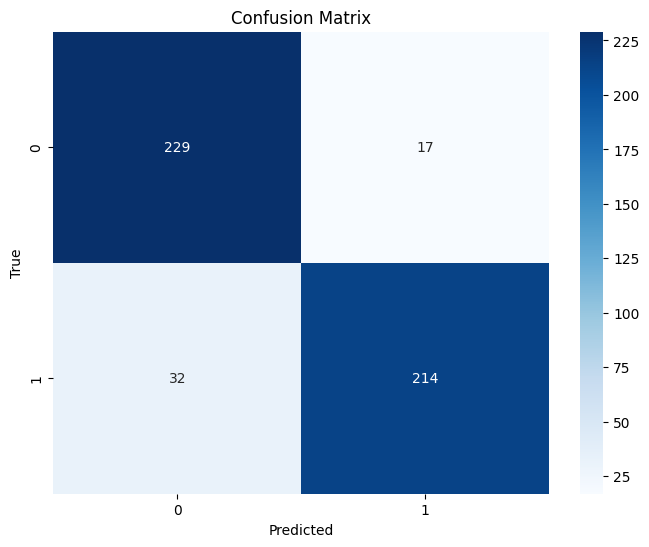

In [ ]:
app.classifier.predict()
app.evaluator.plot_confusion_matrix()

### Error Analysis

In [ ]:
def plot_images_with_labels(images, predictions, true_labels, title):
    plt.figure(figsize=(15, 3))

    for i in range(len(images)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])  # Assuming images are already preprocessed and can be displayed

        pred = predictions[i][0]  # Assuming predictions are in the format [probability]
        true_label = 'Male' if true_labels[i][0] == 1 else 'Female'  # Assuming true labels are in the format [label]

        plt.title(f"True: {true_label}\nPred: {pred*100:.2f}% Male")
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [ ]:
def get_random_wrong_predictions(app, num_samples=5):
    # Identify false negatives and false positives
    false_negatives = np.logical_and(np.array(app.true_labels) == 1, app.predicted_classes == 0)
    false_positives = np.logical_and(np.array(app.true_labels) == 0, app.predicted_classes == 1)

    # Get indices of false negatives and false positives
    false_negative_indices = np.where(false_negatives)[0]
    false_positive_indices = np.where(false_positives)[0]

    test_images = []
    for i in range(len(app.test_generator)):
            images, labels = app.test_generator[i]
            for img in images:
                test_images.append(img)
    test_images = np.array(test_images)


    selected_false_negatives = np.random.choice(false_negative_indices, size=min(num_samples, len(false_negative_indices)), replace=False)
    selected_false_positives = np.random.choice(false_positive_indices, size=min(num_samples, len(false_positive_indices)), replace=False)

    # Get the images, predictions, and true labels for the selected false negatives and false positives

    images_false_negatives = [test_images[i] for i in selected_false_negatives]
    preds_prob_false_negatives = app.predictions[selected_false_negatives]
    true_labels_false_negatives = [app.true_labels[i] for i in selected_false_negatives]

    images_false_positives = [test_images[i] for i in selected_false_positives]
    preds_prob_false_positives = app.predictions[selected_false_positives]
    true_labels_false_positives = [app.true_labels[i] for i in selected_false_positives]

    plot_images_with_labels(images_false_negatives, preds_prob_false_negatives, true_labels_false_negatives, "False Negatives")
    print()
    print()
    plot_images_with_labels(images_false_positives, preds_prob_false_positives, true_labels_false_positives, "False Positives")

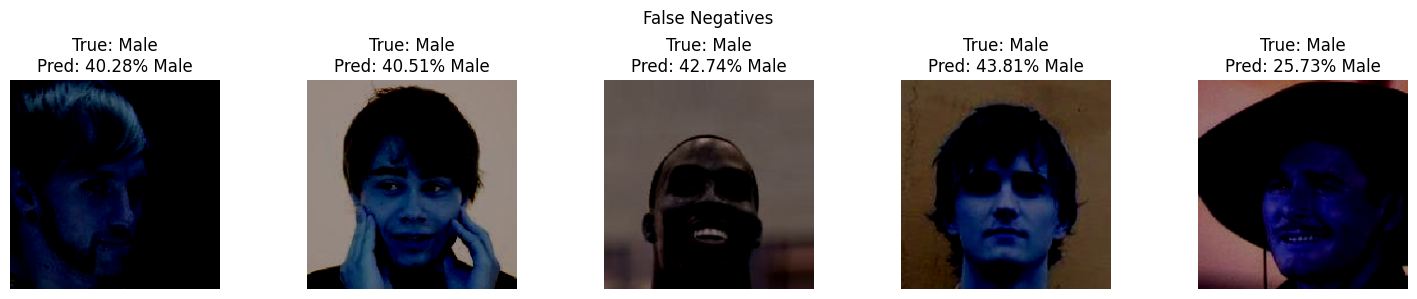

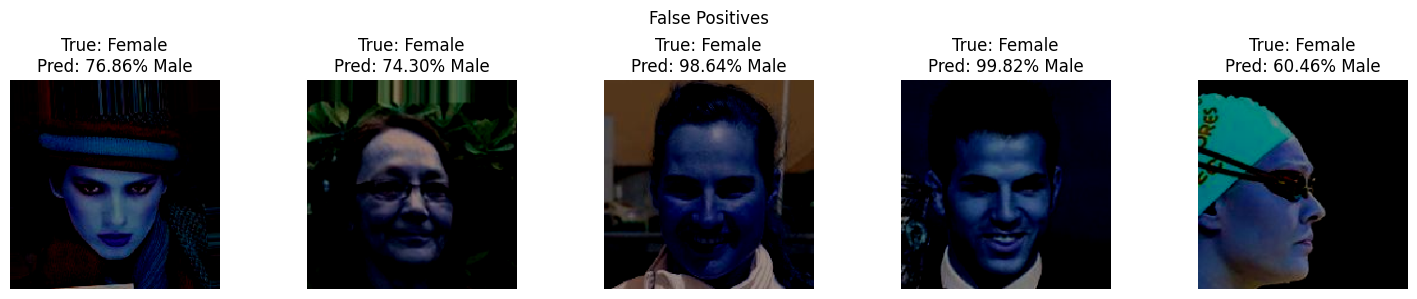

In [ ]:
get_random_wrong_predictions(app, 5)

- Seems to have tendency classifying long hair to `Female` and short hair to `Male`

### Inference Latency

In [ ]:
def inference_latency(app):
    start_time = time.time()

    # Make predictions on a sample data (Replace this with your actual prediction)
    app.classifier.predict()

    end_time = time.time()
    inference_time = end_time - start_time
    print(f"Inference time: {inference_time} seconds on total images: {len(app.test_generator[0][0]) * len(app.test_generator)} and batch_size: {len(app.test_generator[0][0])}")

In [ ]:
inference_latency(app)

16/16 [==============================] - 2s 143ms/step
Inference time: 3.9543700218200684 seconds on total images: 512 and batch_size: 32


In [ ]:
def single_img_inference_latency(app):
    sample_img = app.test_generator[0][0][0].reshape(1, 224, 224, 3)
    start_time = time.time()

    # Make predictions on a sample data (Replace this with your actual prediction)
    app.classifier.model.predict(sample_img)

    end_time = time.time()
    inference_time = end_time - start_time
    print(f"Inference time: {inference_time} seconds")

In [ ]:
single_img_inference_latency(app)

1/1 [==============================] - 0s 39ms/step
Inference time: 0.14367103576660156 seconds


# Conclusion

- VGG
    - VGG16 & VGG19 hard to converge from scratch, better use pretrained weights and do fine tunning
    - `imagenet` pretrained weights is used because though not specific on face recognition but in general many cases can be applied as feature extractor including face recognition
    - the best model gives about 99% training acc, 93% validation acc, and 91% test accuracy with relatively balanced `false negatives` and `false positives`
    - for making single image prediction more or less to 0.088 seconds